# 02.10. Course project

[Go to the bottom of this workbook](#bottom)  <a id="top"></a>

In [1]:
%load_ext lab_black

## A. An overview of the dataset
---

### Task 1. 
_Import the data as a pandas DataFrame into your notebook._

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_pickle("resources/data_385k.pkl", compression="zip")

### Taks 2. 
_Check the number of rows and columns. You should have 385’384 samples and 99 columns._

In [4]:
df.shape

(385384, 99)

### Task 3.
_Display a few entries from the DataFrame._

In [5]:
df.head(3)

,alcohol_by_volume,barcode,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_per_portion,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,copper_cu_per_hundred,...,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit
0,0.0,8001772000030,NaN,NaN,75.00,37.50,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,7610809001066,NaN,NaN,1.50,1.13,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,8002530159021,NaN,NaN,52.68,NaN,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Task 4. 
_Check the data type for each column. Create separate lists to hold the names of columns of the same data typ_

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385384 entries, 0 to 385383
Data columns (total 99 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   alcohol_by_volume                                385384 non-null  float64
 1   barcode                                          385384 non-null  object 
 2   calcium_per_hundred                              264979 non-null  float64
 3   calcium_unit                                     265086 non-null  object 
 4   carbohydrates_per_hundred                        351551 non-null  float64
 5   carbohydrates_per_portion                        11480 non-null   float64
 6   carbohydrates_unit                               351828 non-null  object 
 7   cholesterol_per_hundred                          270282 non-null  float64
 8   cholesterol_unit                                 270329 non-null  object 
 9   copper_cu_per_h

In [7]:
# Count how many times each data type is present in the dataset
pd.value_counts(df.dtypes)

float64    50
object     48
int64       1
dtype: int64

In [8]:
# which has type int64?
df.select_dtypes(include="int64").head(3)

,id
0,1000
1,1001
2,1002


In [9]:
# Create lists containing the columns grouped by their data type
column_numeric = df.select_dtypes(include="number")
column_numeric.shape

(385384, 51)

In [10]:
# Create lists containing the columns grouped by their data type
column_object = df.select_dtypes(include="object")
column_object.shape

(385384, 48)

In [11]:
# Create lists containing the columns grouped by their data type
column_int64 = df.select_dtypes(include="int64")
column_int64.shape

(385384, 1)

## B. Preliminary Exploratory Data Analysis
---

### Task 1.
_Are there any duplicated products in the data? Can you remove them? What is the shape of the remaining data?_

In [12]:
# Count duplicate in the DataFrame
df.duplicated().sum()

10500

In [13]:
# delete the duplicated rows
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(374884, 99)

In [15]:
# check the id
df["id"].is_unique

True

In [16]:
# Check for possible duplicates ignoring the id
is_duplicate = df.drop(labels=["id"], axis=1).duplicated(keep=False)
df[is_duplicate].head(5)

,alcohol_by_volume,barcode,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_per_portion,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,copper_cu_per_hundred,...,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit


### Task 2.
_Show the proportion of missing values in the data using appropriate visualizations and numerical summaries._

In [17]:
df.isnull().sum().sum()

22405005

In [18]:
# Count missing values per column
df.isnull().sum()

alcohol_by_volume                                       0
barcode                                                 0
calcium_per_hundred                                110030
calcium_unit                                       109923
carbohydrates_per_hundred                           26333
                                                    ...  
vitamin_c_ascorbic_acid_unit                       174825
vitamin_d_d2_d3_international_units_per_hundred    307860
vitamin_d_d2_d3_international_units_unit           307859
zinc_per_hundred                                   366369
zinc_unit                                          366351
Length: 99, dtype: int64

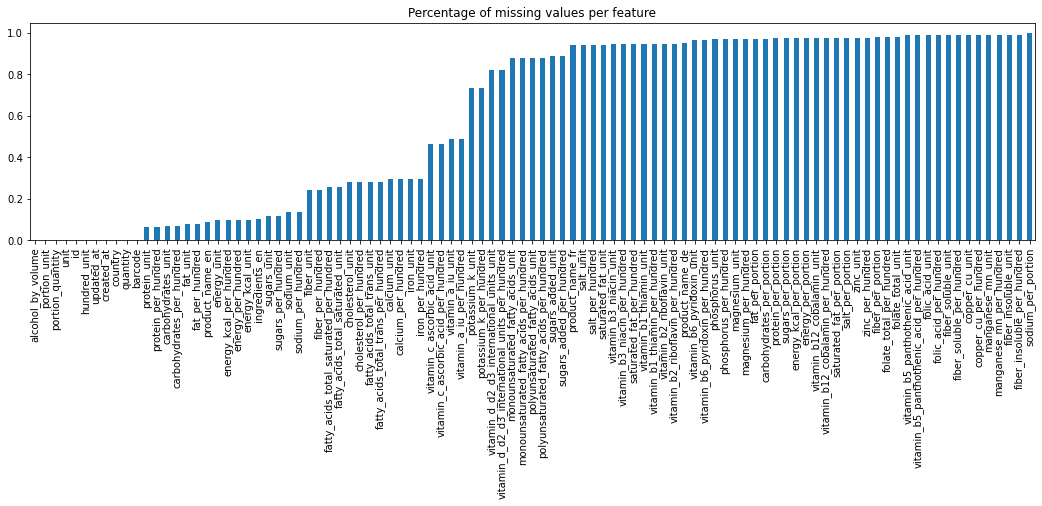

In [19]:
# identify the ratio of missing values per feature.
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(18, 4), title="Percentage of missing values per feature"
)
plt.show()

__Observation__: There are many columns with over 50% of missing data. In some columns there is no missing data at all.

### Task 3.
_Now that you know the extent of missing values in the data, you should address them. Your goal is to keep as much data as possible in your DataFrame. What is the shape of the remaining data?_

In [20]:
# Missing values per column
# Lets drop all features that have more than 70% of missing values.
df = df.dropna(thresh=df.shape[0] * 0.30, axis=1)
df.shape

(374884, 43)

In [21]:
# Missing values per feature
# Lets drop all features that have more than 50% of missing values.
df = df.dropna(thresh=df.shape[1] * 0.50, axis=0)
df.shape

(348965, 43)

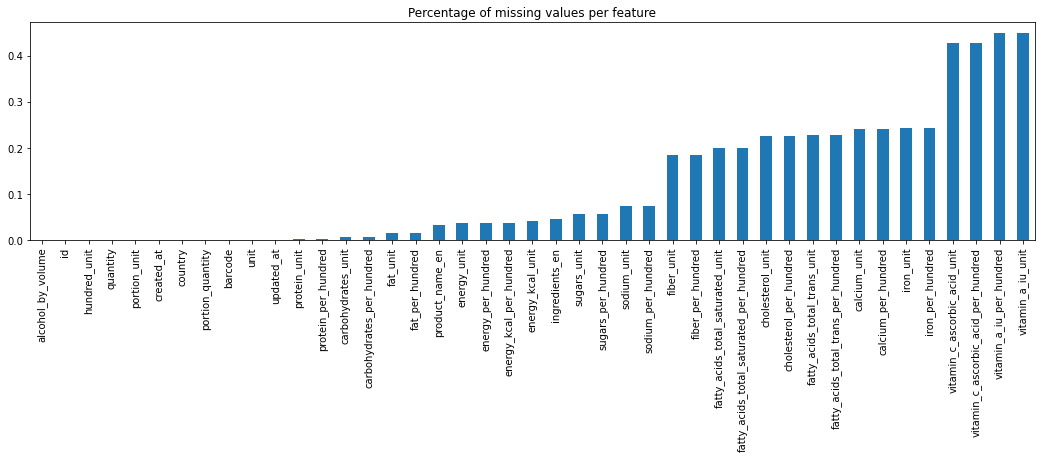

In [22]:
# plot
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(18, 4), title="Percentage of missing values per feature"
)
plt.show()

In [23]:
# Show the top missing values
df.isna().sum().sort_values(ascending=False).head(12)

vitamin_a_iu_unit                      156875
vitamin_a_iu_per_hundred               156875
vitamin_c_ascorbic_acid_per_hundred    148985
vitamin_c_ascorbic_acid_unit           148970
iron_per_hundred                        84598
iron_unit                               84571
calcium_per_hundred                     84220
calcium_unit                            84194
fatty_acids_total_trans_unit            79480
fatty_acids_total_trans_per_hundred     79480
cholesterol_per_hundred                 78698
cholesterol_unit                        78688
dtype: int64

In [24]:
df.shape

(348965, 43)

### Task 4.
_Let’s continue exploring the categorical variables in more detail. What is the number of unique values in categorical variables? Show the proportion of samples in each categorical level in the variables country and unit using appropriate visualizations._

In [25]:
# number of unique values per categorical variable
unique_values_object = df.select_dtypes(include="object").nunique().sort_values()
unique_values_object

fiber_unit                               1
sugars_unit                              1
sodium_unit                              1
protein_unit                             1
iron_unit                                1
vitamin_a_iu_unit                        1
fatty_acids_total_trans_unit             1
fatty_acids_total_saturated_unit         1
vitamin_c_ascorbic_acid_unit             1
energy_unit                              1
energy_kcal_unit                         1
cholesterol_unit                         1
carbohydrates_unit                       1
calcium_unit                             1
fat_unit                                 1
hundred_unit                             2
portion_unit                             5
country                                  6
unit                                     7
created_at                           22591
updated_at                           22611
product_name_en                     219387
ingredients_en                      245341
barcode    

__Observation__: The unit columns only have one value - except for the columns named "hundred_unit", "portion_unit" and "unit".

In [26]:
# display number of count of entries in country as percentages
country_count = df["country"].value_counts(normalize=True)
country_count_percent = country_count * 100
country_count_percent

US    93.620564
CH     6.008052
DE     0.280830
IT     0.075652
FR     0.014615
UK     0.000287
Name: country, dtype: float64

In [27]:
# display number of count of entries in unit as percentages
unit_count = df["unit"].value_counts(normalize=True)
unit_count_percent = unit_count * 100
unit_count_percent

g     86.655395
ml    13.168083
l      0.077945
kg     0.053300
cl     0.040978
dl     0.004012
Lb     0.000287
Name: unit, dtype: float64

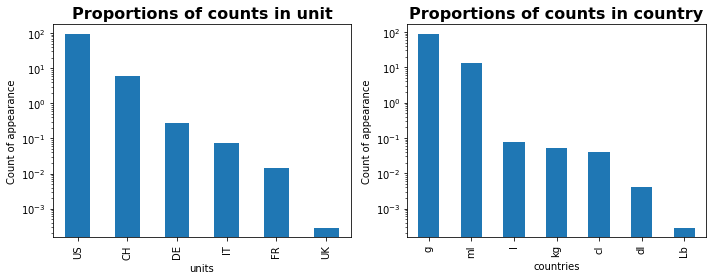

In [28]:
# plot proportions

fig = plt.figure(figsize=(10, 4))

#  subplot #1
plt.subplot(121)  # To generate a 1x2 subplot. subplot at postition 1
country_count_percent.plot(kind="bar")
plt.title("Proportions of counts in unit", fontsize=16, fontweight="bold")
plt.xlabel("units")
plt.ylabel("Count of appearance")
plt.yscale("log")

#  subplot #2
plt.subplot(122)  # To generate a 1x2 subplot. subplot at postition 2
unit_count_percent.plot(kind="bar")
plt.title("Proportions of counts in country", fontsize=16, fontweight="bold")
plt.xlabel("countries")
plt.ylabel("Count of appearance")
plt.yscale("log")

fig.tight_layout()
plt.show()

### Task 5.
_Provide descriptive statistics (e.g., min/max/mean) and informative plots (e.g., histograms) of the numerical variables. You should obtain these plots as subplots._

In [29]:
# select the numerical variables without id
numerical_variables = df.select_dtypes(include="number").drop(columns="id")

In [30]:
# show statistics
numerical_variables.describe().T[["min", "max", "mean", "50%"]].round(2)

,min,max,mean,50%
alcohol_by_volume,0.0,44.00,0.00,0.00
calcium_per_hundred,0.0,684000.00,116.66,36.00
carbohydrates_per_hundred,0.0,6400.00,34.01,23.60
cholesterol_per_hundred,0.0,250000.00,57.66,0.00
energy_kcal_per_hundred,0.0,39600.00,273.19,268.00
energy_per_hundred,0.0,165686.40,1142.58,1121.31
fat_per_hundred,0.0,3200.00,12.70,5.45
fatty_acids_total_saturated_per_hundred,0.0,1000.00,4.94,2.00
fatty_acids_total_trans_per_hundred,0.0,615.38,0.03,0.00
fiber_per_hundred,0.0,1730.00,2.92,1.60


In [31]:
# extract for each feature the most frequent entry
numerical_variables.mode().T

,0
alcohol_by_volume,0.0
calcium_per_hundred,0.0
carbohydrates_per_hundred,0.0
cholesterol_per_hundred,0.0
energy_kcal_per_hundred,0.0
energy_per_hundred,0.0
fat_per_hundred,0.0
fatty_acids_total_saturated_per_hundred,0.0
fatty_acids_total_trans_per_hundred,0.0
fiber_per_hundred,0.0


__Observation__: There are some large maximum values, which inflate the mean. The median is lower. The most frequent entry is 0 for all variables, except for "quantity".

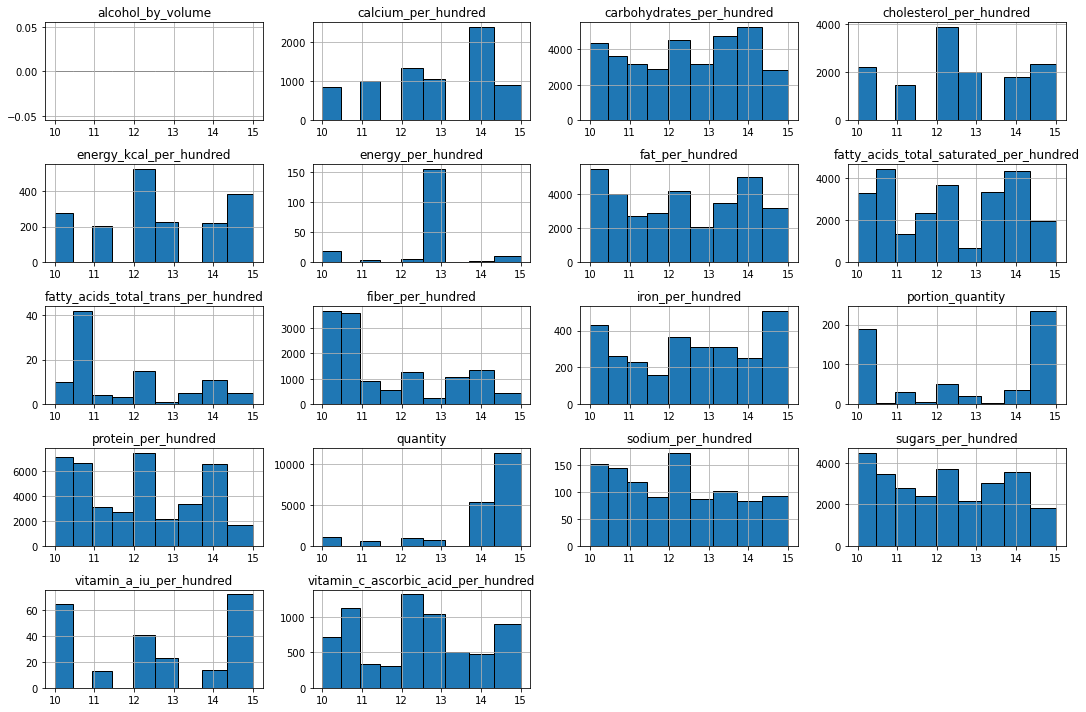

In [32]:
# Plots the histogram for each numerical feature in a separate subplot
numerical_variables.hist(
    bins=np.logspace(start=np.log10(10), stop=np.log10(15), num=10),
    figsize=(15, 10),
    layout=(-1, 4),
    edgecolor="black",
)
plt.gca().set_xscale("log")
plt.tight_layout()

### Task 6.
_Address any unrealistic values or errors. The statistics and your plots of the per_hundred columns (e.g. protein_per_hundred, fat_per_hundred, etc.) can help you spot these values. Afterwards re-do the descriptive statistics and plots to check everything is ok now._

In [33]:
# Create a df containing the columns with "_per_hundred" in their names
per_hundred = df.loc[:, ["per_hundred" in i for i in df.columns]]
per_hundred.head(3).T

,0,1,2
calcium_per_hundred,NaN,NaN,NaN
carbohydrates_per_hundred,75.00,1.5,52.68
cholesterol_per_hundred,NaN,NaN,NaN
energy_kcal_per_hundred,359.00,242.0,325.00
energy_per_hundred,1500.00,1010.0,1358.30
fat_per_hundred,0.42,18.0,12.08
fatty_acids_total_saturated_per_hundred,NaN,NaN,NaN
fatty_acids_total_trans_per_hundred,NaN,NaN,NaN
fiber_per_hundred,NaN,0.0,NaN
iron_per_hundred,NaN,NaN,NaN


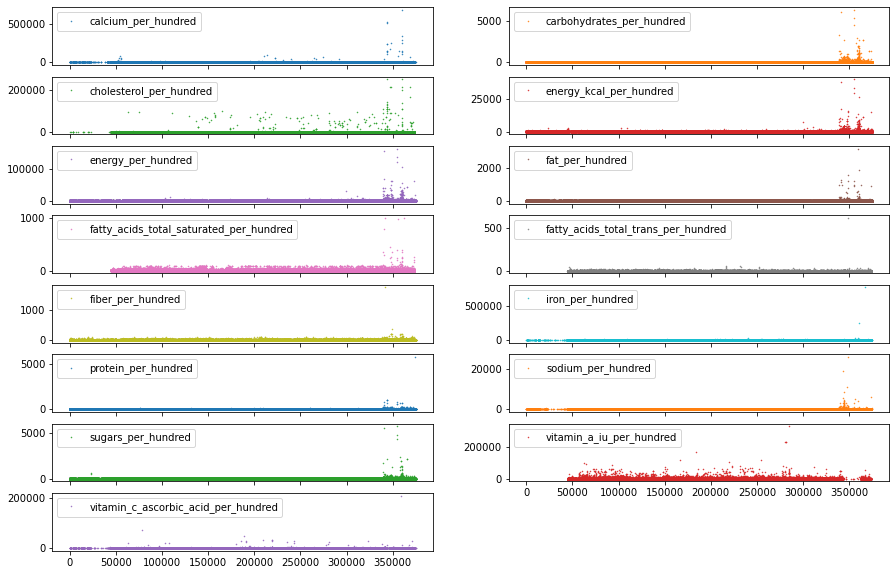

In [34]:
# plot the original data of per_hundred
per_hundred.plot(
    lw=0, marker=".", subplots=True, layout=(-1, 2), figsize=(15, 10), markersize=1
)
plt.show()

In [35]:
# Create a df containing the columns with "_unit" in their names
units = df.loc[:, ["unit" in i for i in df.columns]].drop(
    columns=["unit", "portion_unit", "hundred_unit"]
)
# Have a look at the unit for each column
print(units.apply(lambda col: col.unique()))

  calcium_unit carbohydrates_unit cholesterol_unit energy_kcal_unit  \
0          NaN                  g              NaN             kCal   
1           mg                NaN               mg              NaN   

  energy_unit fat_unit fatty_acids_total_saturated_unit  \
0          kJ        g                              NaN   
1         NaN      NaN                                g   

  fatty_acids_total_trans_unit fiber_unit iron_unit protein_unit sodium_unit  \
0                          NaN        NaN       NaN            g         NaN   
1                            g          g        mg          NaN           g   

  sugars_unit vitamin_a_iu_unit vitamin_c_ascorbic_acid_unit  
0         NaN               NaN                          NaN  
1           g                IU                           mg  


In [36]:
# Mask: gramm
# Let's create a mask which has 'True' for every sample that needs to be dropped
drop_g = (
    per_hundred[
        [
            "carbohydrates_per_hundred",
            "fat_per_hundred",
            "fatty_acids_total_saturated_per_hundred",
            "fatty_acids_total_trans_per_hundred",
            "fiber_per_hundred",
            "protein_per_hundred",
            "sodium_per_hundred",
            "sugars_per_hundred",
        ]
    ]
    > 100
).any(axis=1)

print(drop_g.sum(), "rows of unit gramm should be dropped\n")

1286 rows of unit gramm should be dropped



In [37]:
# Drop: gramm
# Dropping these entries by only selecting the samples that shouldn't be dropped
per_hundred = per_hundred.loc[~drop_g, :]
print(per_hundred.shape, "is the new shape\n")

(347679, 15) is the new shape



In [38]:
# Mask: milligram
drop_mg = (
    per_hundred[
        [
            "calcium_per_hundred",
            "cholesterol_per_hundred",
            "iron_per_hundred",
            "vitamin_c_ascorbic_acid_per_hundred",
        ]
    ]
    .gt(100000)
    .any(axis=1)
)


print(drop_mg.sum(), "rows of unit milligramm should be dropped\n")

37 rows of unit milligramm should be dropped



In [39]:
# Drop: milligram
per_hundred = per_hundred.loc[~drop_mg, :]
print(per_hundred.shape, "is the new shape\n")

(347642, 15) is the new shape



In [40]:
# Mask: kilo joule
drop_kJ = per_hundred["energy_per_hundred"].gt(3700)

print(drop_kJ.sum(), "rows of unit kilo joule should be dropped\n")

455 rows of unit kilo joule should be dropped



In [41]:
# Drop: kilo joule
per_hundred = per_hundred.loc[~drop_kJ, :]
print(per_hundred.shape, "is the new shape\n")

(347187, 15) is the new shape



In [42]:
# Mask: kilo calories -->unklar!!
drop_kCal = per_hundred["energy_kcal_per_hundred"].gt(3700)
print(drop_kCal.sum(), "rows of unit kilo calories should be dropped\n")

0 rows of unit kilo calories should be dropped



In [43]:
# Drop: kilo calories
per_hundred = per_hundred.loc[~drop_kCal, :]
print(per_hundred.shape, "is the new shape\n")

(347187, 15) is the new shape



In [44]:
# Mask: IU
drop_IU = per_hundred["vitamin_a_iu_per_hundred"].gt(333300000000)
print(drop_IU.sum(), "rows of unit IU should be dropped\n")

0 rows of unit IU should be dropped



In [45]:
# Drop: IU
per_hundred = per_hundred.loc[~drop_IU, :]
print(per_hundred.shape, "is the new shape\n")

(347187, 15) is the new shape



In [46]:
# reflect the changes in the original data frame
df.loc[:, ["per_hundred" in i for i in df.columns]] = per_hundred

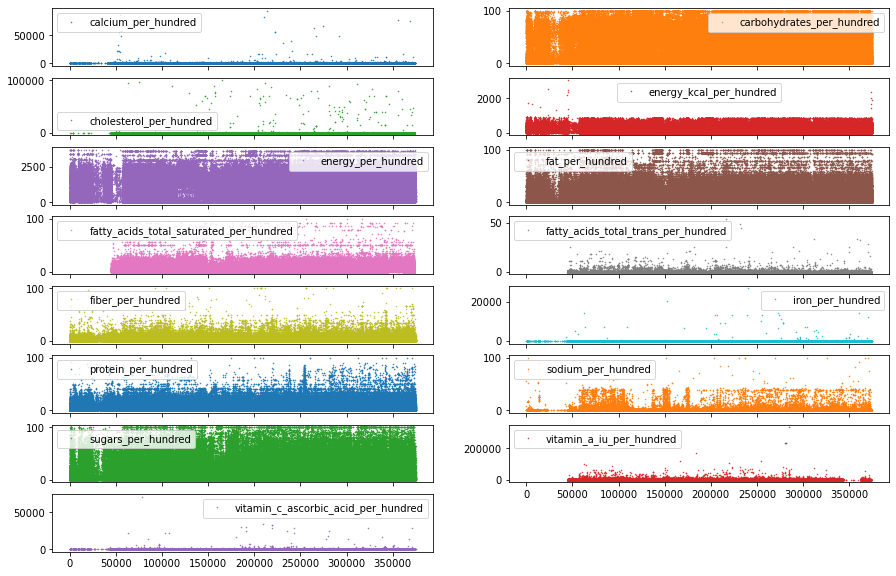

In [47]:
# Plot again
df.loc[:, ["per_hundred" in i for i in df.columns]].plot(
    lw=0, marker=".", subplots=True, layout=(-1, 2), figsize=(15, 10), markersize=1
)
plt.show()

In [48]:
# repeat statistics and check resulst
df.describe().T[["min", "max", "mean", "50%"]].round(2)

,min,max,mean,50%
alcohol_by_volume,0.0,44.00,0.00,0.00
calcium_per_hundred,0.0,93750.00,97.96,36.00
carbohydrates_per_hundred,0.0,100.00,33.37,23.53
cholesterol_per_hundred,0.0,100000.00,41.30,0.00
energy_kcal_per_hundred,0.0,3034.00,268.71,267.00
energy_per_hundred,0.0,3700.00,1123.79,1117.13
fat_per_hundred,0.0,100.00,12.47,5.36
fatty_acids_total_saturated_per_hundred,0.0,100.00,4.85,2.00
fatty_acids_total_trans_per_hundred,0.0,53.57,0.03,0.00
fiber_per_hundred,0.0,100.00,2.88,1.60


In [49]:
df.shape

(348965, 43)

### Task 7.
_Do you spot any other inconsistencies in the data? What about the sum of a product’s protein, fat, carbohydrates, salt, and fiber content?_

In [50]:
# calculate the sum
sum_df = (
    df["carbohydrates_per_hundred"]
    + df["fat_per_hundred"]
    + df["fiber_per_hundred"]
    + df["protein_per_hundred"]
)
sum_df

0          NaN
1         38.5
2          NaN
3         94.2
4         98.0
          ... 
374867    20.4
374877    94.2
374878     NaN
374880     NaN
374881     NaN
Length: 348965, dtype: float64

In [51]:
# check number of entries with a sum over 100
sum_over_100 = sum_df > 100

sum_over_100.sum()

27879

__Observation:__ If the sum is over 100, there are false values in the data. Let's drop those entries.

In [52]:
# reflect the results on the dataframe
df["sum_over_100"] = sum_over_100

In [53]:
# show 2 examples
df[(df.sum_over_100 == True)].head(2)

,alcohol_by_volume,barcode,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,country,created_at,...,sodium_unit,sugars_per_hundred,sugars_unit,unit,updated_at,vitamin_a_iu_per_hundred,vitamin_a_iu_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,sum_over_100
321,0.0,7610200085030,NaN,NaN,71.0,g,NaN,NaN,CH,2016-06-03T14:11:11.884Z,...,NaN,8.0,g,g,2021-03-01T21:20:01.114Z,NaN,NaN,NaN,NaN,True
1022,0.0,7610095183002,NaN,NaN,69.0,g,NaN,NaN,CH,2016-06-27T15:10:59.630Z,...,NaN,6.0,g,g,2021-02-07T09:25:41.322Z,NaN,NaN,NaN,NaN,True


In [54]:
# drop the outliers
df.drop(df[df["sum_over_100"] == True].index, inplace=True)

In [55]:
df.shape

(321086, 44)

### Task 8.
_Despite removing recording errors from the per_hundred columns, some of them still contain “extreme” values, which are distinct from the rest of the data points. Your goal is to pick a few variables from the per_hundred list and address outliers._

__Manual outlier removal__

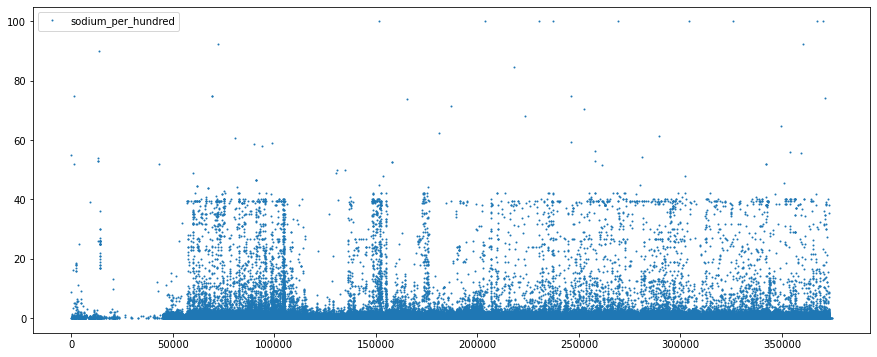

In [56]:
# Let's have a look at Sodium
df[["sodium_per_hundred"]].plot(
    lw=0, marker=".", subplots=True, figsize=(15, 6), markersize=2
)
plt.show()

__Observation:__ There seems to be a natural border at around 40. I consider everything higher than 45 as outliers.

In [57]:
# Let's create a mask which has 'True' for every sample that needs to be dropped
sodium_drop = df["sodium_per_hundred"].gt(45)
print("Sodium:", sodium_drop.sum())

Sodium: 57


In [58]:
# Dropping these entries by only selecting the samples that shouldn't be dropped
df = df.loc[~(sodium_drop)]

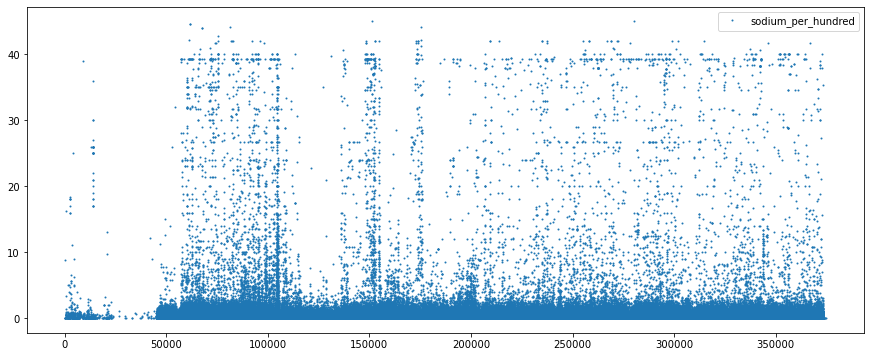

In [59]:
# Let's have a look at Sodium again
df[["sodium_per_hundred"]].plot(
    lw=0, marker=".", subplots=True, figsize=(15, 6), markersize=2
)
plt.show()

In [60]:
df.shape

(321029, 44)

__Using Z-scores to identify outlier candidates__

/Users/tabea-retina/opt/anaconda3/envs/adsml/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


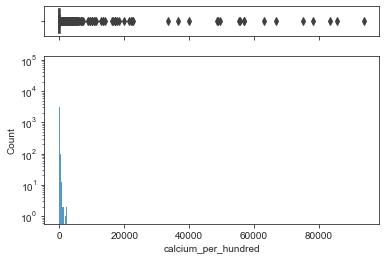

In [61]:
# Let's have a look at Calcium
sns.set_style("ticks")
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(
    2, sharex=True, gridspec_kw={"height_ratios": (0.15, 0.85)}
)

# assigning a graph to each ax
sns.boxplot(df["calcium_per_hundred"], ax=ax_box)
sns.histplot(data=df, x="calcium_per_hundred", ax=ax_hist)

# Remove x axis name for the boxplot
ax_box.set(xlabel="")

plt.yscale("log")
plt.show()

In [62]:
# Statistics for Calicum
df[["calcium_per_hundred"]].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
calcium_per_hundred,237706.0,97.33,588.0,0.0,0.0,33.0,100.0,93750.0


In [63]:
# skewness is a measure of symmetry, the larger the number is the more the data lack symmetry
# Kurtosis is a measure of whether the data is heavy- or light-tailed relative to a normal distribution.
df["calcium_per_hundred"].agg(["skew", "kurtosis"]).T

skew           99.083159
kurtosis    12181.866396
Name: calcium_per_hundred, dtype: float64

__Observation:__ There is a peak close to Zero, which represent the most common values. The data in the graph are left-skewed. There is some date at the fare right side, but only a few. Let's us the rule 3-times greater than the standard deviation from the mean to detect outliers. Because z-scores expect variables with quasi-normal distributions, I will transform the skewed variables by log-transforming them before using z-scores for outlier detection. The data is highly skewed!

In [64]:
# log-transforming of skewed data
# first create a new column with the insert() method
# then use the log() method
df.insert(len(df.columns), "calcium_log", np.log(df[["calcium_per_hundred"]]))

In [65]:
# rule “greater than standard deviation from the mean” for Calcium
zfilter_calcium = np.abs(df["calcium_log"] - df["calcium_log"].mean()) > (
    3 * df["calcium_log"].std()
)

In [66]:
# outlier entries
outliers_calcium = df.loc[zfilter_calcium, "calcium_log"]

In [67]:
# drop the outliers
df = df.drop(outliers_calcium.index, axis=0)
df.shape

(321029, 45)

/Users/tabea-retina/opt/anaconda3/envs/adsml/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/tabea-retina/opt/anaconda3/envs/adsml/lib/python3.9/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


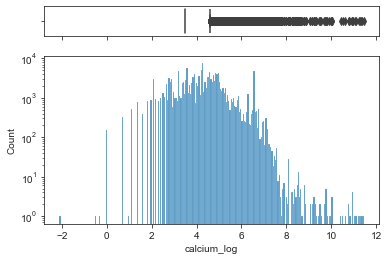

In [68]:
# Let's have a look at Calcium_log
sns.set_style("ticks")
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(
    2, sharex=True, gridspec_kw={"height_ratios": (0.15, 0.85)}
)

# assigning a graph to each ax
sns.boxplot(df["calcium_log"], ax=ax_box)
sns.histplot(data=df, x="calcium_log", ax=ax_hist)

# Remove x axis name for the boxplot
ax_box.set(xlabel="")

plt.yscale("log")
plt.show()

## C.In-depth Exploratory Data Analysis

### Task 2.
Your goal is to analyze organic vs. non-organic products distribution in the Open Food database. Look for terms such as “bio” and “organic” in the product names.

In [69]:
# let's look at some entries
df["product_name_en"][0:6]

0                                Bio Spaghetti 
1                         Naturaplan Mozzarella
2    Caffè Mauro - Roasted organic coffee blend
3       Le chocolat Cailler -  chocolate powder
4           Naturaplan Extra Dark Chocolate 70%
5                                           NaN
Name: product_name_en, dtype: object

In [70]:
# defining a Series corresponding to the products
products = df["product_name_en"]

In [71]:
products.shape

(321029,)

In [72]:
# convert to lowercase
products = products.str.lower()

In [73]:
# look for the strings bio, organic and natural
organic = products.str.contains("bio|organic|natural", na=False)
products[organic]

0                                            bio spaghetti 
2                caffè mauro - roasted organic coffee blend
8                              naturaplan bio flower honey 
127                          ramseier: apple juice, natural
178                     naturaplan - coconut milk (organic)
                                ...                        
374410                              bio maté (mint & lemon)
374565    love chock - organic raw chocolate (hazelnut m...
374605                                coop karma - bio oat 
374627                             karma - bio nature tofu 
374831               coop naturaplan bio - oolong green tea
Name: product_name_en, Length: 20888, dtype: object

In [74]:
# To have these changes reflected in the original DataFrame
df["organic"] = organic

In [75]:
# show first 10 entries
df.loc[:, ["product_name_en", "organic"]].head(10)

,product_name_en,organic
0,Bio Spaghetti,True
1,Naturaplan Mozzarella,False
2,Caffè Mauro - Roasted organic coffee blend,True
3,Le chocolat Cailler - chocolate powder,False
4,Naturaplan Extra Dark Chocolate 70%,False
5,NaN,False
6,Toblerone,False
7,Knöpfli flour,False
8,Naturaplan Bio Flower Honey,True
9,Maltesers,False


#### Task 1.
_Count the number of organic and non-organic products in each country. Is there a country with a higher percentage of organic products?_

In [76]:
# get rid of UK and AT because they only have one product
df = df[((df.country != "AT") & (df.country != "UK"))]

In [77]:
# group by country, normalzie the values and make them percentages
df_count = df.groupby("country")["organic"].value_counts(normalize=True)
df_count * 100

country  organic
CH       False      96.803106
         True        3.196894
DE       False      93.265306
         True        6.734694
FR       False      98.039216
         True        1.960784
IT       False      97.709924
         True        2.290076
US       False      93.258630
         True        6.741370
Name: organic, dtype: float64

In [78]:
# unstack
df_count = df_count.unstack(1)
df_count

organic,False,True
country,,
CH,0.968031,0.031969
DE,0.932653,0.067347
FR,0.980392,0.019608
IT,0.977099,0.022901
US,0.932586,0.067414


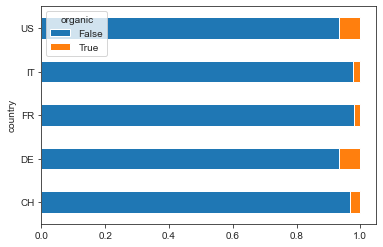

In [79]:
# plot the percentages of organic and non-organic products per country
df_count.div(df_count.sum(axis=1), axis=0).plot(kind="barh", stacked=True)
plt.show()

__Observation__: The hightst values are in the US, followed by Germany.

#### Task 2.
_Is there a difference in the nutrients’ distribution between organic and non-organic products in each country?_

In [80]:
# Add the column country to the per_hundred dataframe
country = df["country"]
per_hundred["country"] = country

In [81]:
# Add the column organic to the per_hundred dataframe
organic = df["organic"]
per_hundred["organic"] = organic

In [82]:
# show some entries
per_hundred.head()

,calcium_per_hundred,carbohydrates_per_hundred,cholesterol_per_hundred,energy_kcal_per_hundred,energy_per_hundred,fat_per_hundred,fatty_acids_total_saturated_per_hundred,fatty_acids_total_trans_per_hundred,fiber_per_hundred,iron_per_hundred,protein_per_hundred,sodium_per_hundred,sugars_per_hundred,vitamin_a_iu_per_hundred,vitamin_c_ascorbic_acid_per_hundred,country,organic
0,NaN,75.00,NaN,359.0,1500.0,0.42,NaN,NaN,NaN,NaN,11.00,NaN,NaN,NaN,NaN,CH,True
1,NaN,1.50,NaN,242.0,1010.0,18.00,NaN,NaN,0.0,NaN,19.00,NaN,1.50,NaN,NaN,CH,False
2,NaN,52.68,NaN,325.0,1358.3,12.08,NaN,NaN,NaN,NaN,19.05,NaN,0.25,NaN,NaN,CH,True
3,NaN,70.40,NaN,402.0,1679.0,7.90,NaN,NaN,9.1,NaN,6.80,NaN,65.80,NaN,NaN,CH,False
4,NaN,37.00,NaN,591.0,2470.0,44.00,NaN,NaN,9.0,NaN,8.00,NaN,29.00,NaN,NaN,CH,False


In [83]:
# group by country and organic, take the mean of the values to compare them
grouped = per_hundred.groupby(["country", "organic"]).mean()
grouped

calcium_per_hundred  carbohydrates_per_hundred  \
country organic                                                   
CH      False             279.235222                  30.138709   
        True              198.873684                  26.640812   
DE      False             189.427273                  34.994380   
        True                     NaN                  49.528788   
FR      False             364.000000                  25.413600   
        True                     NaN                  66.000000   
IT      False             296.500000                  36.519492   
        True                     NaN                  11.916667   
US      False              96.727365                  32.082234   
        True              100.254912                  25.556092   

                 cholesterol_per_hundred  energy_kcal_per_hundred  \
country organic                                                     
CH      False                  21.950000               283.253593   
        True                    0.000000               245.157815   
DE      False                        NaN               313.271350   
        True                         NaN               351.833333   
FR      False                        NaN               269.720000   
        True                         NaN               389.000000   
IT      False                        NaN               317.052344   
        True                         NaN               107.166667   
US      False                  43.973140               249.012636   
        True                   36.152518               208.534215   

                 energy_per_hundred  fat_per_hundred  \
country organic                                        
CH      False           1177.426772        14.185226   
        True            1023.740724        11.297451   
DE      False           1311.079737        15.247577   
        True            1467.500000        11.745455   
FR      False            971.320000        10.495102   
        True            1641.000000         6.300000   
IT      False           1318.029412        14.892530   
        True             450.833333         1.133333   
US      False           1041.868812        10.897679   
        True             872.507090         9.731076   

                 fatty_acids_total_saturated_per_hundred  \
country organic                                            
CH      False                                        NaN   
        True                                         NaN   
DE      False                                        NaN   
        True                                         NaN   
FR      False                                        NaN   
        True                                         NaN   
IT      False                                        NaN   
        True                                         NaN   
US      False                                   4.555266   
        True                                    4.322880   

                 fatty_acids_total_trans_per_hundred  fiber_per_hundred  \
country organic                                                           
CH      False                                    NaN           2.869364   
        True                                     NaN           3.660690   
DE      False                                    NaN           5.372840   
        True                                     NaN           6.676923   
FR      False                                    NaN           5.394643   
        True                                     NaN           6.000000   
IT      False                                    NaN           3.871453   
        True                                     NaN           6.033333   
US      False                               0.033400           2.003032   
        True                                0.005481           2.652836   

                 iron_per_hundred  protein_per_hundred  sodium_per_hundred  \
country or

In [84]:
# stack
grouped2 = grouped.stack()
grouped2

country  organic                                     
CH       False    calcium_per_hundred                     279.235222
                  carbohydrates_per_hundred                30.138709
                  cholesterol_per_hundred                  21.950000
                  energy_kcal_per_hundred                 283.253593
                  energy_per_hundred                     1177.426772
                                                            ...     
US       True     protein_per_hundred                       6.297143
                  sodium_per_hundred                        0.425404
                  sugars_per_hundred                       12.735378
                  vitamin_a_iu_per_hundred                727.291420
                  vitamin_c_ascorbic_acid_per_hundred      18.747545
Length: 105, dtype: float64

selected_features = grouped2[
    [
        "carbohydrates_per_hundred",
        "energy_kcal_per_hundred",
        "fat_per_hundred",
        "fiber_per_hundred",
        "sugars_per_hundred",
        "protein_per_hundred",
    ]
]

In [85]:
# Series to dataframe
grouped3 = grouped2.to_frame().reset_index()
grouped3.head(2)

,country,organic,level_2,0
0,CH,False,calcium_per_hundred,279.235222
1,CH,False,carbohydrates_per_hundred,30.138709


In [86]:
# rename the columns
grouped3.rename(
    columns={grouped3.columns[2]: "nutrients", grouped3.columns[3]: "values"},
    inplace=True,
)
grouped3.head(2)

,country,organic,nutrients,values
0,CH,False,calcium_per_hundred,279.235222
1,CH,False,carbohydrates_per_hundred,30.138709


In [87]:
import math

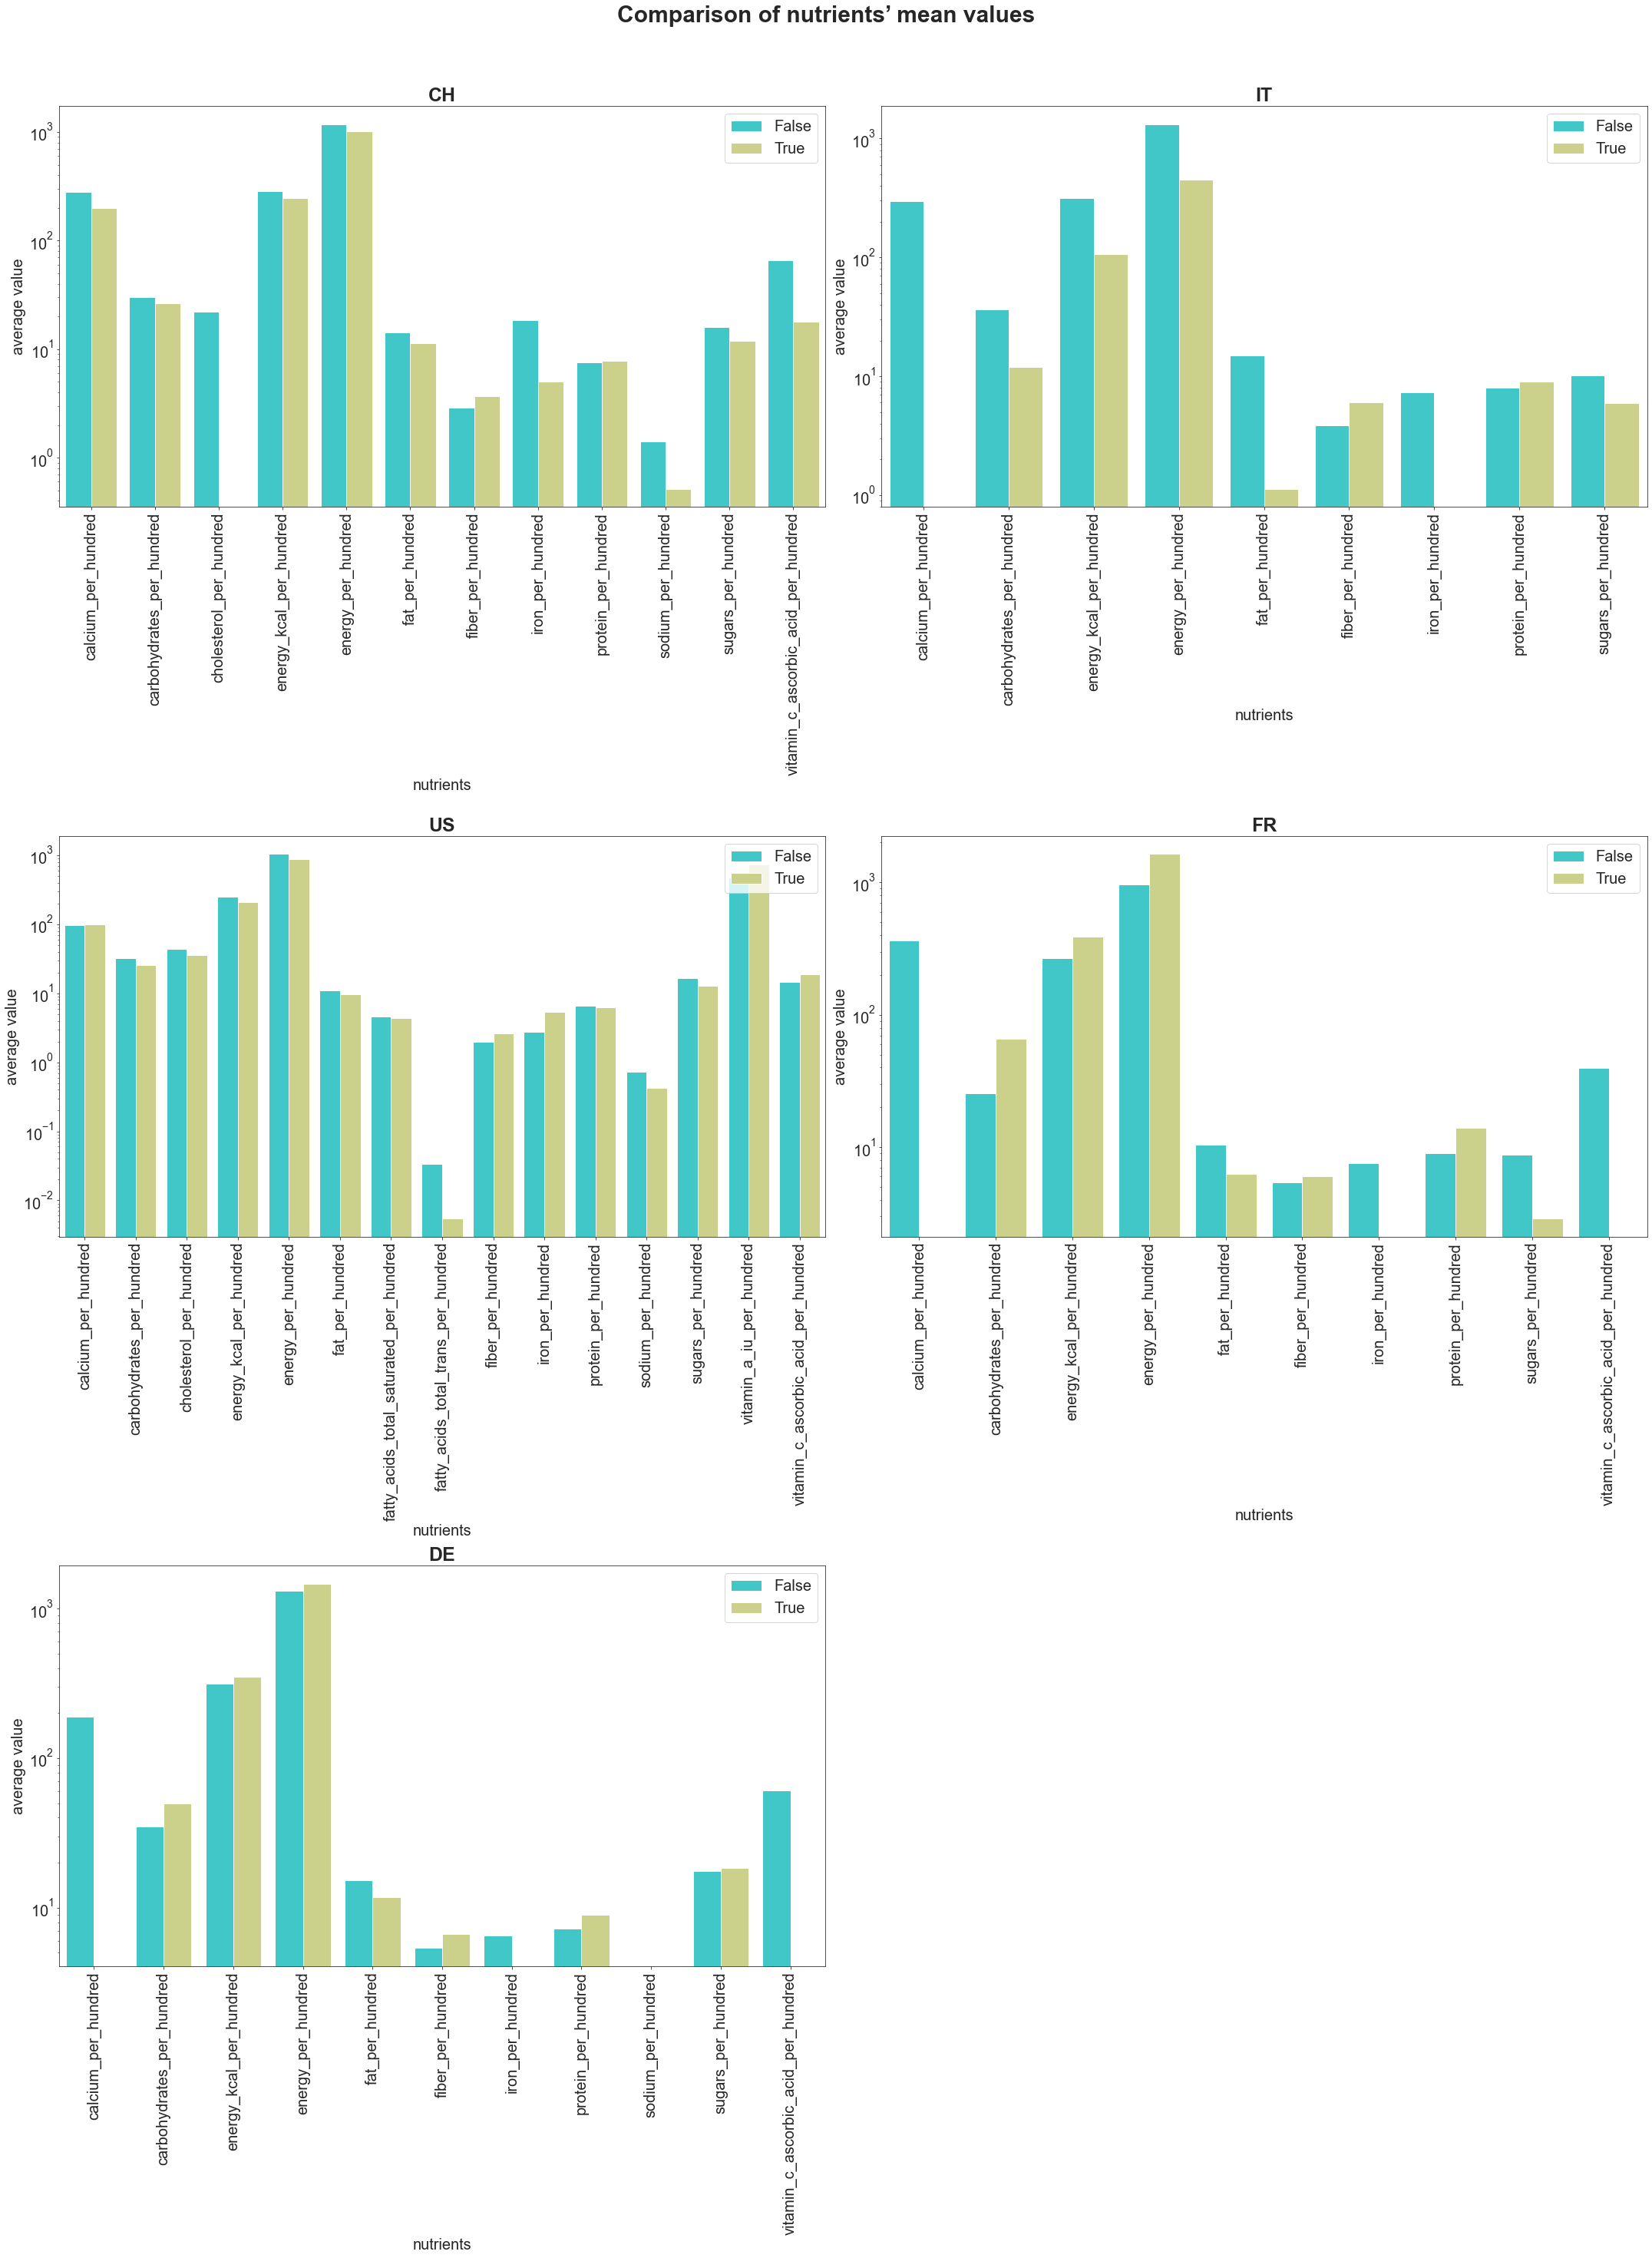

In [88]:
# get each of the countries
countries = set(grouped3["country"])

# Calculate the number of subplots based on the number of countries
ncols = 2
nrows = math.ceil(len(countries) / ncols)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30, 40))

# plot using a for loop and the zip function
for country, ax in zip(countries, axes.flatten()):

    # Filter data for each country
    country_df = grouped3[grouped3["country"] == country]  # Select by country name

    # Populate subplots
    sns.barplot(
        data=country_df,
        x="nutrients",
        y="values",
        hue="organic",
        ax=ax,
        log=True,
        palette="rainbow",
    )

    # Add x/y labels, titles and ticks
    ax.set_xlabel("nutrients", fontsize=20)
    ax.set_ylabel("average value", fontsize=20)
    ax.tick_params(axis="x", rotation=90, labelsize=20)
    ax.tick_params(axis="y", labelsize=20)
    ax.set_title(country, fontsize=25, fontweight="bold")
    ax.legend(fontsize=20, loc="upper right")

# set the last of the 6 subplots to invisible, as we only have 5 countries
axes[2][1].set_visible(False)

# Subtitle
fig.suptitle(
    "Comparison of nutrients’ mean values", fontsize=30, fontweight="bold", y=1.02
)
fig.tight_layout()
plt.show()

### Task 4.
_Your goal is to find the top common food allergens in the Open Food database. Look for common allergens in the ingredients_en column._

In [89]:
# defining a Series corresponding to the ingredients
ingred = df["ingredients_en"]
ingred = ingred.str.lower()
ingred.shape

(321028,)

In [90]:
celery = ingred.str.contains("celery", na=False)
df["celery"] = celery

In [91]:
gluten = ingred.str.contains("barley|oats", na=False)
df["gluten"] = gluten

In [92]:
crustaceans = ingred.str.contains("prawns|crabs|lobsters|crab|prawn|lobster", na=False)
df["crustaceans"] = crustaceans

In [93]:
eggs = ingred.str.contains("egg|eggs", na=False)
df["eggs"] = eggs

In [94]:
fish = ingred.str.contains("fish", na=False)
df["fish"] = fish

In [95]:
lupin = ingred.str.contains("lupin|lupins", na=False)
df["lupin"] = lupin

In [96]:
milk = ingred.str.contains("milk", na=False)
df["milk"] = milk

In [97]:
mollusks = ingred.str.contains("mussels|oysters|mussel|oyster", na=False)
df["mollusks"] = mollusks

In [98]:
mustard = ingred.str.contains("mustard", na=False)
df["mustard"] = mustard

In [99]:
peanuts = ingred.str.contains("peanuts|peanut", na=False)
df["peanuts"] = peanuts

In [100]:
sesame = ingred.str.contains("sesame", na=False)
df["sesame"] = sesame

In [101]:
soybeans = ingred.str.contains("soybeans|soybean", na=False)
df["soybeans"] = soybeans

In [102]:
tree_nuts = ingred.str.contains(
    "almonds|hazelnuts|walnuts|brazil nuts|cashews|pecans|pistachios|macadamia nuts|almond|hazelnut|walnut|brazil nut|cashew|pecan|pistachio|macadamia nut",
    na=False,
)
df["tree_nuts"] = tree_nuts

In [103]:
# create a df called allergies containing all the allergies and their boolean values
allergies = df.select_dtypes(include="boolean").drop(columns="organic")

allergies.head()

,sum_over_100,celery,gluten,crustaceans,eggs,fish,lupin,milk,mollusks,mustard,peanuts,sesame,soybeans,tree_nuts
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#### Task 1.
_What are the top common food allergens in the Open Food database?_

In [104]:
# Sum over all the columns
alllergies_sum = allergies.sum()
alllergies_sum

sum_over_100        0
celery          11984
gluten          26852
crustaceans      1235
eggs            35700
fish             1943
lupin              94
milk            97321
mollusks          435
mustard          9652
peanuts         10617
sesame           8010
soybeans        59563
tree_nuts       17842
dtype: int64

In [105]:
# Series to dataframe
alllergies_sum = alllergies_sum.to_frame().reset_index()
alllergies_sum.drop(index=df.index[0], axis=0, inplace=True)

alllergies_sum.head(2)

,index,0
1,celery,11984
2,gluten,26852


In [106]:
# rename the columns
alllergies_sum.rename(
    columns={
        alllergies_sum.columns[0]: "allergens",
        alllergies_sum.columns[1]: "values",
    },
    inplace=True,
)
alllergies_sum.head(2)

,allergens,values
1,celery,11984
2,gluten,26852


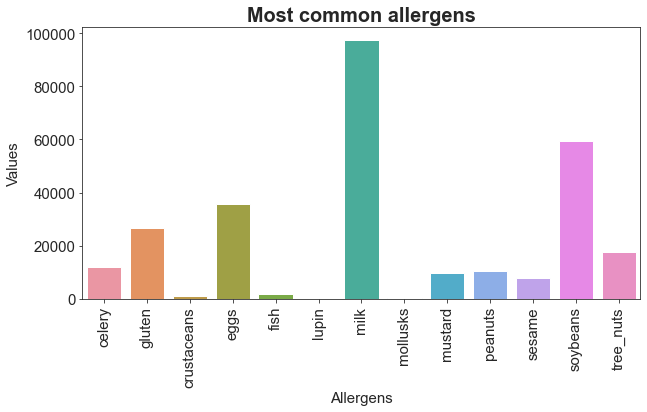

In [107]:
# plot
fig = plt.figure(figsize=(10, 5))

# creating the bar plot
sns.barplot(x="allergens", y="values", data=alllergies_sum)

# Add x/y labels, titles and ticks
plt.xlabel("Allergens", fontsize=15)
plt.ylabel("Values", fontsize=15)
plt.tick_params(axis="x", rotation=90, labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.title("Most common allergens", fontsize=20, fontweight="bold")


plt.show()

__Oberservation__: The most common food allergens are milk.

#### Task 2.
_What is the distribution of common food allergens across countries? Is there a country with a higher percentage of products containing allergens?_

In [108]:
# Add the column country the the allergies dataframe
country = df["country"]
allergies["country"] = country
allergies.head(2)

,sum_over_100,celery,gluten,crustaceans,eggs,fish,lupin,milk,mollusks,mustard,peanuts,sesame,soybeans,tree_nuts,country
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,CH
1,False,False,False,False,False,False,False,True,False,False,False,False,False,False,CH


In [109]:
# normalization step 1
numerator = allergies.groupby(["country"]).sum()
numerator.head(2)

,sum_over_100,celery,gluten,crustaceans,eggs,fish,lupin,milk,mollusks,mustard,peanuts,sesame,soybeans,tree_nuts
country,,,,,,,,,,,,,,
CH,0,324,922,11,1632,161,39,3315,15,382,214,464,177,1332
DE,0,35,36,0,59,2,13,155,0,33,52,60,8,88


In [110]:
# normalization step 2
denominator = allergies.groupby(["country"]).count()
denominator.head(2)

,sum_over_100,celery,gluten,crustaceans,eggs,fish,lupin,milk,mollusks,mustard,peanuts,sesame,soybeans,tree_nuts
country,,,,,,,,,,,,,,
CH,20864,20864,20864,20864,20864,20864,20864,20864,20864,20864,20864,20864,20864,20864
DE,980,980,980,980,980,980,980,980,980,980,980,980,980,980


In [111]:
# normalization step 3
allergies_values = numerator / denominator * 100
allergies_values

,sum_over_100,celery,gluten,crustaceans,eggs,fish,lupin,milk,mollusks,mustard,peanuts,sesame,soybeans,tree_nuts
country,,,,,,,,,,,,,,
CH,0.0,1.552914,4.419095,0.052722,7.822086,0.771664,0.186925,15.888612,0.071894,1.830905,1.025690,2.223926,0.848351,6.384202
DE,0.0,3.571429,3.673469,0.000000,6.020408,0.204082,1.326531,15.816327,0.000000,3.367347,5.306122,6.122449,0.816327,8.979592
FR,0.0,1.960784,0.000000,0.000000,3.921569,1.960784,0.000000,11.764706,0.000000,1.960784,0.000000,1.960784,0.000000,0.000000
IT,0.0,1.526718,9.923664,0.000000,14.503817,1.908397,0.000000,23.282443,0.000000,1.145038,2.671756,4.198473,1.145038,5.343511
US,0.0,3.887965,8.655239,0.409541,11.365773,0.593567,0.014053,31.379425,0.140529,3.089293,3.461025,2.500744,19.866431,5.489994


In [112]:
# unstack
allergies_grouped2 = allergies_values.unstack(1)
allergies_grouped2

              country
sum_over_100  CH         0.000000
              DE         0.000000
              FR         0.000000
              IT         0.000000
              US         0.000000
                           ...   
tree_nuts     CH         6.384202
              DE         8.979592
              FR         0.000000
              IT         5.343511
              US         5.489994
Length: 70, dtype: float64

In [113]:
# series to dataframe
allergies_df = allergies_grouped2.to_frame().reset_index()
allergies_df.head(2)

,level_0,country,0
0,sum_over_100,CH,0.0
1,sum_over_100,DE,0.0


In [114]:
# rename the columns
allergies_df.rename(
    columns={allergies_df.columns[2]: "values", allergies_df.columns[0]: "allergy"},
    inplace=True,
)
allergies_df.head(2)

,allergy,country,values
0,sum_over_100,CH,0.0
1,sum_over_100,DE,0.0


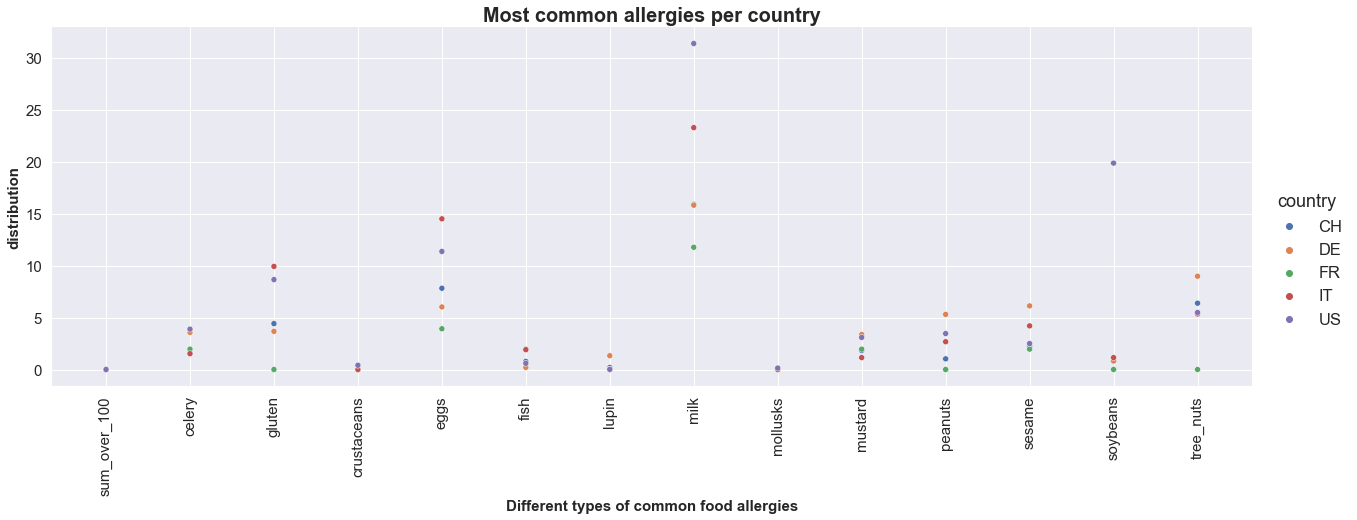

In [115]:
# plot values per allergy
sns.set(font_scale=1.5)
sns.pairplot(
    allergies_df,
    x_vars=["allergy"],
    y_vars=["values"],
    hue="country",
    height=6,
    aspect=3,
)

# Add x/y labels, titles and ticks
plt.xlabel("Different types of common food allergies", fontsize=15, fontweight="bold")
plt.ylabel("distribution", fontsize=15, fontweight="bold")
plt.tick_params(axis="x", rotation=90, labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.title("Most common allergies per country", fontsize=20, fontweight="bold")


plt.show()

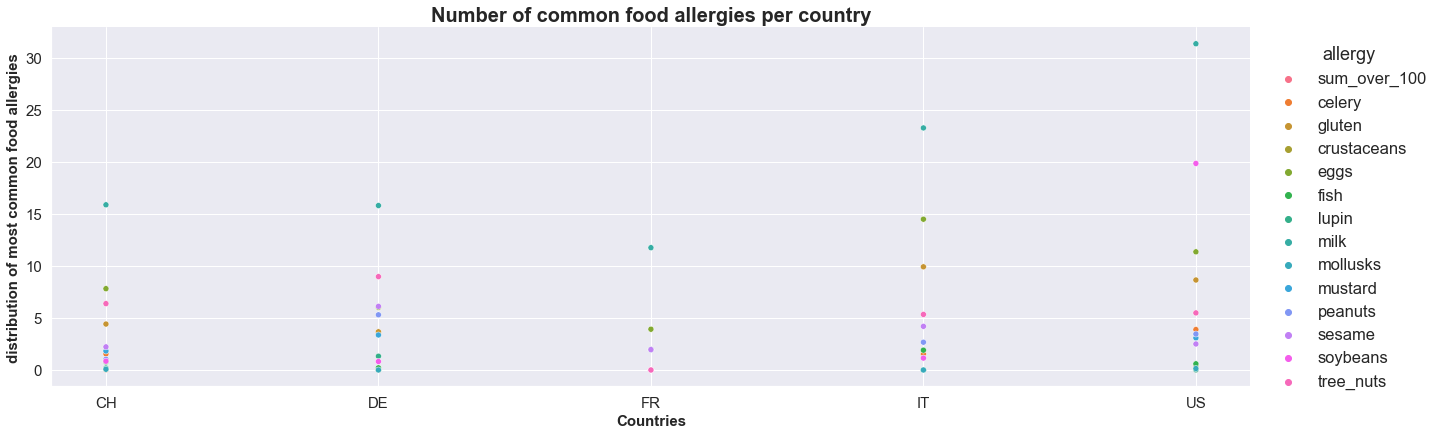

In [116]:
# plot values per country
sns.set(font_scale=1.5)
sns.pairplot(
    allergies_df,
    x_vars=["country"],
    y_vars=["values"],
    hue="allergy",
    height=6,
    aspect=3,
)

# Add x/y labels, titles and ticks
plt.xlabel("Countries", fontsize=15, fontweight="bold")
plt.ylabel("distribution of most common food allergies", fontsize=15, fontweight="bold")
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.title("Number of common food allergies per country", fontsize=20, fontweight="bold")

plt.show()

__Observation__: The most common food allergen for all countries is milk. There are also many products with the allergens eggs, gluten and tree nuts. In the US, there are many products with the allergen soybean - in other countries not. 
The country with the highest percentage of products containing allergens is the US, followed by Italy. 

## D. Text data

In [117]:
pd.set_option("display.max_colwidth", 500)

In [118]:
# have a look at the original entries
df[["product_name_en", "ingredients_en"]][0:7]

,product_name_en,ingredients_en
0,Bio Spaghetti,"Superior quality durum wheat Pasta\r\n\r\nIngredients: Durum wheat, water\r\n\r\nAll agricultural ingredients are products of organic farming"
1,Naturaplan Mozzarella,"Bio Milk (Switzerland), kitchen salt"
2,Caffè Mauro - Roasted organic coffee blend,100% coffee Arabica
3,Le chocolat Cailler - chocolate powder,"Powdered chocolate 99% (sugar, cocoa), emulsifier (soy lecithin), flavour (vanillin), Cinnamon. 32% cocoa minimum."
4,Naturaplan Extra Dark Chocolate 70%,"cocoa paste * (Honduras), raw cane sugar * (Paraguay), cocoa butter * (Dominican Republic), vanilla beans *. Cocoa content of chocolate: 70% minimum.\r\n\r\n* Ingredients in accordance with Fairtrade Fairtrade standards 100% of the total weight. Of which products cocoa base sugars with mass balance.\r\n\r\nAll agricultural ingredients come from farms that are being converted to organic farming."
5,NaN,cocoa powder
6,Toblerone,"Sugar, whole milk powder, cocoa butter, cocoa mass, honey (3.0%), concentrated butter, almonds (1.6%), emulsifier (soy lecithin), egg white, flavoring.\r\nCocoa: 28% minimum in milk chocolate."


In [119]:
df.shape

(321028, 59)

In [120]:
# replace the missing value in the column 'ingredients_en' with a string
df["ingredients_en"].fillna(value="Ingredients unknown", inplace=True)

In [121]:
# defining a Series corresponding to the products
ingredients = df["ingredients_en"]
ingredients.shape

(321028,)

In [122]:
# regex pattern
def transform(s):

    s = s.str.replace(r"[0-9]", "", regex=True)  # to remove  digits
    s = s.str.replace(r"%", "", regex=True)  # to remove  %
    s = s.str.replace(r"\*", "", regex=True)  # to remove  *
    s = s.str.replace(r"\([^()]*\)", "", regex=True)  # to remove everything in brackets
    s = s.str.replace(r"\..*", "", regex=True)  # to remove everything after dot
    s = s.str.replace(r",,", ",", regex=True)  # to remove 2 commas
    s = s.str.replace(r",  ,", ", ", regex=True)  # to remove 2 white spaces
    s = s.str.replace(r"   ", " ", regex=True)  # to remove 3 white spaces
    s = s.str.replace(r" ,", ",", regex=True)  # to remove wrong white space
    s = s.str.replace(r"\r\n", " ", regex=True)  # to remove \r\n\
    s = s.str.replace(r"\r\n\r\n", " ", regex=True)  # to remove \r\n\r\n
    s = s.str.replace(
        r"[^\w\s\,]", ",", regex=True
    )  # to replace punctuation except comma with comma
    return s

In [123]:
# apply definition
ingredients = transform(ingredients)
ingredients[0:7]

0                                                                                                               Superior quality durum wheat Pasta  Ingredients, Durum wheat, water  All agricultural ingredients are products of organic farming
1                                                                                                                                                                                                                          Bio Milk, kitchen salt
2                                                                                                                                                                                                                                  coffee Arabica
3                                                                                                                                                                                              Powdered chocolate , emulsifier, flavour, Cinnamon
4    cocoa paste , raw cane suga

In [124]:
# Split document on comma, count the number of tokens
df["ingredients_split"] = ingredients.apply(lambda x: len(x.split(",")))

In [125]:
# descriptive statistics for token counts
ingredients.apply(lambda x: len(x.split(","))).describe()

count    321028.000000
mean         10.326517
std           9.270826
min           1.000000
25%           4.000000
50%           8.000000
75%          14.000000
max         173.000000
Name: ingredients_en, dtype: float64

In [126]:
# To have these changes reflected in the original DataFrame
df["ingredients_clean"] = ingredients

In [127]:
# have a look at the df
df.loc[
    :, ["product_name_en", "ingredients_en", "ingredients_clean", "ingredients_split"]
].head(7)

,product_name_en,ingredients_en,ingredients_clean,ingredients_split
0,Bio Spaghetti,"Superior quality durum wheat Pasta\r\n\r\nIngredients: Durum wheat, water\r\n\r\nAll agricultural ingredients are products of organic farming","Superior quality durum wheat Pasta Ingredients, Durum wheat, water All agricultural ingredients are products of organic farming",3
1,Naturaplan Mozzarella,"Bio Milk (Switzerland), kitchen salt","Bio Milk, kitchen salt",2
2,Caffè Mauro - Roasted organic coffee blend,100% coffee Arabica,coffee Arabica,1
3,Le chocolat Cailler - chocolate powder,"Powdered chocolate 99% (sugar, cocoa), emulsifier (soy lecithin), flavour (vanillin), Cinnamon. 32% cocoa minimum.","Powdered chocolate , emulsifier, flavour, Cinnamon",4
4,Naturaplan Extra Dark Chocolate 70%,"cocoa paste * (Honduras), raw cane sugar * (Paraguay), cocoa butter * (Dominican Republic), vanilla beans *. Cocoa content of chocolate: 70% minimum.\r\n\r\n* Ingredients in accordance with Fairtrade Fairtrade standards 100% of the total weight. Of which products cocoa base sugars with mass balance.\r\n\r\nAll agricultural ingredients come from farms that are being converted to organic farming.","cocoa paste , raw cane sugar , cocoa butter , vanilla beans \n Ingredients in accordance with Fairtrade Fairtrade standards of the total weight\n All agricultural ingredients come from farms that are being converted to organic farming",4
5,NaN,cocoa powder,cocoa powder,1
6,Toblerone,"Sugar, whole milk powder, cocoa butter, cocoa mass, honey (3.0%), concentrated butter, almonds (1.6%), emulsifier (soy lecithin), egg white, flavoring.\r\nCocoa: 28% minimum in milk chocolate.","Sugar, whole milk powder, cocoa butter, cocoa mass, honey, concentrated butter, almonds, emulsifier, egg white, flavoring\nCocoa, minimum in milk chocolate",11


### Task 1.
_Which product has the longest ingredients list?_

In [128]:
# We know from the statistics, which product with the longest ingredients list
longest = df[(df.ingredients_split == 173)]
longest[["ingredients_clean", "product_name_en"]]

,ingredients_clean,product_name_en
241595,"MASHED POTATOES ,WATER, DEHYDRATED POTATO FLAKES, SEASONING SAUCE ,VEGETABLE OIL, WATER, MONO AND DIGLYCERIDES WITH BHT AND CITRIC ACID TO PROTECT FLAVOR, BETA CAROTENE FOR COLOR ,, CONTAINS OR LESS OF, SALT, DRIED DAIRY BLEND ,WHEY, CALCIUM CASEINATE,,,, SMOKEY CHIPOTLE BARBEQUE SAUCE ,HIGH FRUCTOSE CORN SYRUP, TOMATO PASTE, DISTILLED VINEGAR, MOLASSES, MODIFIED CORN STARCH, SMOKE FLAVOR, CHILI CHIPOTLE PEPPER CONCENTRATE, SALT, CELLULOSE GEL, CELLULOSE GUM, POTASSIUM CHLORIDE ONION POWDER...","HUNGRY-MAN, SMOKIN' BACKYARD BARBEQUE"


In [129]:
# Another way to detect the the product with the longest ingredients' list:
longest = df[(df.ingredients_split == df.ingredients_split.max())]
longest[["ingredients_clean", "product_name_en"]]

,ingredients_clean,product_name_en
241595,"MASHED POTATOES ,WATER, DEHYDRATED POTATO FLAKES, SEASONING SAUCE ,VEGETABLE OIL, WATER, MONO AND DIGLYCERIDES WITH BHT AND CITRIC ACID TO PROTECT FLAVOR, BETA CAROTENE FOR COLOR ,, CONTAINS OR LESS OF, SALT, DRIED DAIRY BLEND ,WHEY, CALCIUM CASEINATE,,,, SMOKEY CHIPOTLE BARBEQUE SAUCE ,HIGH FRUCTOSE CORN SYRUP, TOMATO PASTE, DISTILLED VINEGAR, MOLASSES, MODIFIED CORN STARCH, SMOKE FLAVOR, CHILI CHIPOTLE PEPPER CONCENTRATE, SALT, CELLULOSE GEL, CELLULOSE GUM, POTASSIUM CHLORIDE ONION POWDER...","HUNGRY-MAN, SMOKIN' BACKYARD BARBEQUE"


### Task 2.
_Which products have the shortest ingredients list?_

In [130]:
# As we know from the statistics, the products with the longest ingredients list have 1 token
shortest = df[(df.ingredients_split == 1)]
shortest[["product_name_en", "ingredients_clean"]]

,product_name_en,ingredients_clean
2,Caffè Mauro - Roasted organic coffee blend,coffee Arabica
5,NaN,cocoa powder
7,Knöpfli flour,durum wheat flour
8,Naturaplan Bio Flower Honey,Honey
12,Naturaplan Apricot Jam,Ingredients unknown
...,...,...
374866,NaN,Ingredients unknown
374867,NaN,Ingredients unknown
374877,NaN,Ingredients unknown
374878,NaN,Ingredients unknown


In [131]:
# Another way to detect the the product with the shortest ingredients' list:
shortest = df[(df.ingredients_split == df.ingredients_split.min())]
shortest[["product_name_en", "ingredients_clean"]]

,product_name_en,ingredients_clean
2,Caffè Mauro - Roasted organic coffee blend,coffee Arabica
5,NaN,cocoa powder
7,Knöpfli flour,durum wheat flour
8,Naturaplan Bio Flower Honey,Honey
12,Naturaplan Apricot Jam,Ingredients unknown
...,...,...
374866,NaN,Ingredients unknown
374867,NaN,Ingredients unknown
374877,NaN,Ingredients unknown
374878,NaN,Ingredients unknown


__Consideration__: let's ignore all products with nan values for the product name and all products with "ingredients unkown" in the ingredients.

In [132]:
df1 = df[df["product_name_en"].notna()]
df2 = df1[df1["ingredients_clean"] != "Ingredients unknown"]

In [133]:
df2.shape

(304711, 61)

In [134]:
# Show some of the products with only one ingredient
longest = df2[(df2.ingredients_split == 1)]
longest[["product_name_en", "ingredients_clean"]]

,product_name_en,ingredients_clean
2,Caffè Mauro - Roasted organic coffee blend,coffee Arabica
7,Knöpfli flour,durum wheat flour
8,Naturaplan Bio Flower Honey,Honey
22,Spur: orange juice & banana,Pressed oranges and pureed bananas
38,Elmer: lemon,Mineral water enriched with natural lemon flavor
...,...,...
373346,EXTRA FINE GREEN BEANS,GREEN BEANS
373670,Sprouts - Rolled Quick Oats,whole grain rolled oats
373874,Kroger - Red Lentils,red lentils
374201,Tadim - Roasted sunflower seeds,Roasted extra salted sunflower seeds


### Task 3.
_Which are the most frequent ingredients in products? You will also choose an appropriate method to visualize your findings._

In [135]:
# Load English stopwords from nltk

import nltk

nltk.download("stopwords", quiet=True)

from nltk.corpus import stopwords

stopwords_english = stopwords.words("english")

In [136]:
# Define preprocess_text function
import re


def preprocess_text(text):

    # Convert to lowercase
    clean_text = text.lower()

    # Remove comma
    clean_text = re.sub(r",", "", clean_text)

    # Remove stop words and split on whitespace
    processed_sample_tokens = [
        tok for tok in clean_text.split() if tok not in stopwords_english
    ]

    return processed_sample_tokens

In [137]:
# this function will aplly the process to all ingredients
ingredients_clean_2 = [preprocess_text(doc) for doc in df["ingredients_clean"]]

In [138]:
# Show an example of processed and tokenized text
print(ingredients_clean_2[0])

['superior', 'quality', 'durum', 'wheat', 'pasta', 'ingredients', 'durum', 'wheat', 'water', 'agricultural', 'ingredients', 'products', 'organic', 'farming']


In [139]:
# Import Gensim and Phrases

import gensim
from gensim.models import Phrases

In [140]:
# Find common collocations

# Create an instance of the Phrases model
n_gram_model = Phrases(
    ingredients_clean_2,  # Expected input format: list of tokenized texts
    min_count=5,  # Keeps only collocations with at least min_counts
    delimiter=b"_",
)  # Glue character used to join collocation tokens

In [141]:
# Apply Phrases to ingredients

ingredients_clean_3 = [n_gram_model[doc] for doc in ingredients_clean_2]

In [142]:
print(ingredients_clean_3[0])

['superior', 'quality', 'durum', 'wheat', 'pasta', 'ingredients', 'durum', 'wheat', 'water', 'agricultural', 'ingredients', 'products', 'organic', 'farming']


In [143]:
from collections import Counter

Counter = Counter(tuple(item) for item in ingredients_clean_3)

In [144]:
# Print top-25 most frequent tokens in clean_sample
most_occur = Counter.most_common(25)

most_occur

[(('ingredients', 'unknown'), 15419),
 (('pasteurized', 'milk', 'cheese', 'culture', 'salt', 'enzymes', 'annatto'),
  691),
 (('extra_virgin', 'olive', 'oil'), 503),
 (('carbonated', 'water', 'natural', 'flavor'), 500),
 (('durum', 'wheat', 'semolina'), 363),
 (('pasteurized', 'milk', 'cheese', 'culture', 'salt', 'enzymes'), 360),
 (('honey',), 342),
 (('spring', 'water', 'co', 'natural', 'flavors'), 339),
 (('pasteurized', 'partskim', 'milk', 'cheese', 'culture', 'salt', 'enzymes'),
  329),
 (('semolina',
   'durum',
   'flour',
   'niacin_ferrous',
   'sulfate',
   'thiamin_mononitrate',
   'riboflavin_folic',
   'acid'),
  327),
 (('green', 'beans', 'water', 'salt'), 321),
 (('shrimp', 'salt', 'sodium', 'tripolyphosphate'), 275),
 (('broccoli',), 260),
 (('semolina',
   'niacin_ferrous',
   'sulfate',
   'thiamin_mononitrate',
   'riboflavin_folic',
   'acid'),
  260),
 (('soybean', 'oil'), 249),
 (('carbonated', 'water', 'natural', 'flavors'), 245),
 (('green', 'beans'), 240),
 (('

__Observation__: It is a list, not single tokens. I have to flatten the list into a numpy array.

In [145]:
type(ingredients_clean_3)

list

In [146]:
# Create one dimension ndArray from a list of lists
npArray = np.array([elem for singleList in ingredients_clean_3 for elem in singleList])

In [147]:
# Create a dataframe from the numpy array
np_to_df = pd.DataFrame(npArray)

In [148]:
# Print the top-25 most frequent tokens
top25 = np_to_df.value_counts().nlargest(25)
top25

salt          183463
sugar         162877
oil           137736
water         133597
acid          125969
corn          117189
organic       116210
natural       115154
flour         103447
milk           84093
syrup          83496
sodium         81200
flavor         80032
gum            74560
wheat          70673
powder         68040
starch         63036
citric         62694
juice          57734
less           55971
soy            54042
artificial     50601
garlic         48787
flavors        47411
cheese         45362
dtype: int64

In [149]:
# Series to dataframe
top25 = top25.to_frame()

In [150]:
# rename the columns
top25.rename(
    columns={
        top25.columns[0]: "count",
    },
    inplace=True,
)

# rename the index
top25.index.names = ["ingredients"]

# show head
top25.head(2)

,count
ingredients,
salt,183463
sugar,162877


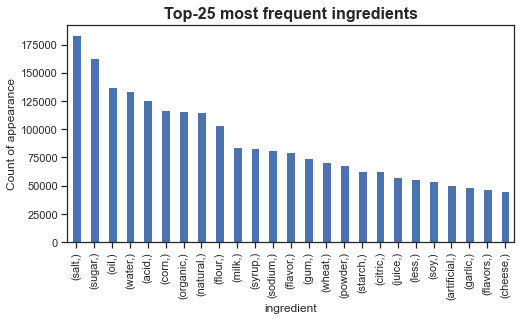

In [151]:
# plot the top-25 most frequent tokens
sns.set(rc={"figure.figsize": (8, 4)})
sns.set_style("ticks")

top25.plot(kind="bar")

# add overall title, labels and legend
plt.title("Top-25 most frequent ingredients", fontsize=16, fontweight="bold")
plt.xlabel("ingredient")
plt.ylabel("Count of appearance")
plt.legend().set_visible(False)


plt.show()

## E. Time-series data

### Task 1.
Your task is to investigate the total number of items created each month at each hour. You should use the created_at column to draw a heatmap with the hours (0 to 23) on the x-axis and the months (1 to 12) on the y-axis. The color of the heatmap should show the number of items created at each month-hour pair.

In [152]:
# have a look at the original data
df["created_at"]

0         2016-06-01T11:42:22.908Z
1         2016-06-01T11:42:25.111Z
2         2016-06-01T11:42:25.900Z
3         2016-06-01T11:42:26.184Z
4         2016-06-01T11:42:26.350Z
                    ...           
374867    2021-10-03T15:29:47.648Z
374877    2021-10-04T13:57:48.140Z
374878    2021-10-04T14:02:42.220Z
374880    2021-10-04T14:12:06.476Z
374881    2021-10-04T14:22:10.685Z
Name: created_at, Length: 321028, dtype: object

In [153]:
# create a column with the month and hour of each row
df["month"] = pd.DatetimeIndex(df["created_at"]).month
df["hours"] = pd.DatetimeIndex(df["created_at"]).hour

In [154]:
# check if the values are correct
df["month"].unique()

array([ 6,  5,  7,  8,  9, 11, 12,  1,  2,  3,  4, 10])

In [155]:
# check if the values are correct
df["hours"].unique()

array([11, 14, 10, 12, 17, 19, 16, 13,  6,  7,  9, 15, 20,  8, 21, 22, 18,
       23,  0,  1,  5,  4,  2,  3])

In [156]:
# get the number of products per month and hour
count_time = df.groupby(["month", "hours"])["product_name_en"].count()
count_time

month  hours
1      6         2
       7        14
       8        36
       9        82
       10       58
                ..
12     17       19
       18        5
       19        2
       20       14
       21       19
Name: product_name_en, Length: 210, dtype: int64

In [157]:
# Series to dataframe
time_df = count_time.to_frame().reset_index()
time_df.head(2)

,month,hours,product_name_en
0,1,6,2
1,1,7,14


In [158]:
# rename the columns
time_df.rename(
    columns={time_df.columns[2]: "number of products"},
    inplace=True,
)
time_df.head(2)

,month,hours,number of products
0,1,6,2
1,1,7,14


In [159]:
# pivot
time_df = time_df.pivot("month", "hours", "number of products")

In [160]:
time_df

hours,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
month,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,2.0,14.0,36.0,82.0,...,22.0,5.0,1.0,5.0,1.0,3.0,2.0,NaN,0.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,50.0,35.0,...,18.0,15.0,2.0,3.0,0.0,2.0,3.0,27.0,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,1.0,13.0,41.0,25.0,...,35.0,22.0,16.0,28.0,2.0,3.0,15.0,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,0.0,2.0,12.0,89.0,27.0,48.0,...,33.0,4.0,6.0,2.0,2.0,7.0,4.0,2.0,NaN,NaN
5,NaN,NaN,1.0,NaN,NaN,NaN,7.0,22.0,42.0,28.0,...,19.0,8.0,4.0,12.0,0.0,9.0,NaN,NaN,NaN,NaN
6,NaN,NaN,2.0,NaN,NaN,0.0,48.0,37.0,62.0,39.0,...,147.0,45.0,19.0,8.0,9.0,3.0,5.0,1.0,33.0,0.0
7,208.0,8.0,NaN,NaN,NaN,1.0,390.0,39.0,30.0,17.0,...,25.0,66.0,463.0,68.0,63.0,206.0,546.0,304.0,186.0,202.0
8,2.0,1.0,1.0,0.0,NaN,1.0,7.0,9.0,11.0,15.0,...,11.0,15.0,9.0,5.0,5.0,15.0,12.0,1.0,1.0,1.0
9,NaN,NaN,NaN,NaN,NaN,1.0,145.0,40.0,28.0,72.0,...,29.0,128.0,948.0,477.0,452.0,725.0,1.0,252.0,NaN,NaN


In [161]:
# sort the months from 1 to 12
time_df.sort_index(level=0, ascending=False, inplace=True)

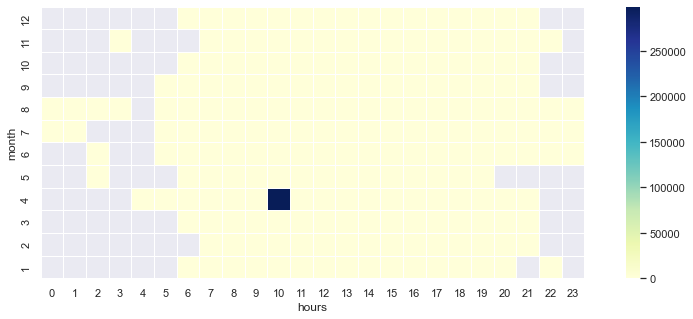

In [162]:
# Plot correlation matrix
sns.set_style("dark")
plt.figure(figsize=(15, 5))
sns.heatmap(time_df, square=True, linewidths=0.5, cmap="YlGnBu")
plt.show()

### Task 2.
Your task is to investigate the evolution of the total number of items over time. You should draw a bar plot with the date (e.g., in yyyy-mm format) on the x-axis and the total number of items created during each month on the y-axis. Each bar in the plot should stack the number of items created by each country each month. Please make sure all bars are visible by choosing the appropriate scale for the y-axis.

In [163]:
# turn this column data as type of datetime
df["created_at"] = pd.to_datetime(df["created_at"])

In [164]:
df["created_at"].dtypes

datetime64[ns, UTC]

In [165]:
# change the style of the date
df["year_month"] = df["created_at"].dt.strftime("%Y-%m")

In [166]:
# check the unique dates
df["year_month"].unique()

array(['2016-06', '2016-05', '2016-07', '2016-08', '2016-09', '2016-11',
       '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-06',
       '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02',
       '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
       '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02',
       '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08',
       '2019-09', '2019-10', '2019-11', '2019-12', '2020-01', '2020-02',
       '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08',
       '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02',
       '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08',
       '2021-09', '2021-10'], dtype=object)

In [167]:
# get the number of products per year and month
count_year_month = df.groupby(["year_month", "country"])["product_name_en"].count()
count_year_month

year_month  country
2016-05     CH           15
2016-06     CH          377
2016-07     CH         3052
2016-08     CH           12
2016-09     CH         3511
                       ... 
2021-06     US            2
2021-07     CH           49
2021-08     CH           33
2021-09     CH           30
2021-10     CH            1
Name: product_name_en, Length: 96, dtype: int64

In [168]:
# Series to dataframe
year_month_df = count_year_month.to_frame().reset_index()
year_month_df.head(2)

,year_month,country,product_name_en
0,2016-05,CH,15
1,2016-06,CH,377


In [169]:
# rename the columns
year_month_df.rename(
    columns={
        year_month_df.columns[0]: "date",
        year_month_df.columns[2]: "values",
    },
    inplace=True,
)
year_month_df.head(2)

,date,country,values
0,2016-05,CH,15
1,2016-06,CH,377


In [170]:
# set date and country as index
# unstack() to move values out of index and make a column
# droplevel() to clean up multi index columns

year_month_df = (
    year_month_df.set_index(["date", "country"]).unstack(1).droplevel(0, axis=1)
)
year_month_df.head(2)

country,CH,DE,FR,IT,US
date,,,,,
2016-05,15.0,NaN,NaN,NaN,NaN
2016-06,377.0,NaN,NaN,NaN,NaN


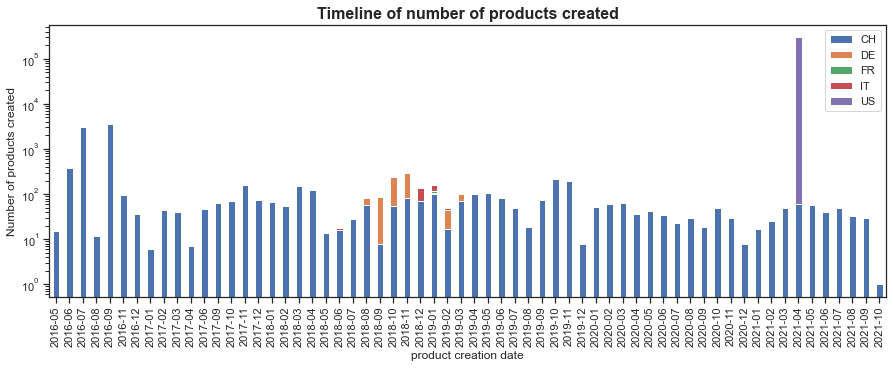

In [171]:
# plot
sns.set(rc={"figure.figsize": (15, 5)})
sns.set_style("ticks")

# create stacked bar chart
year_month_df.plot(
    kind="bar",
    stacked=True,
    log=True,
)

# add overall title, labels and legend
plt.title("Timeline of number of products created", fontsize=16, fontweight="bold")
plt.xlabel("product creation date")
plt.ylabel("Number of products created")
plt.legend(loc="upper right")
plt.xticks(rotation=90)


plt.show()

## F. Correlation analysis

### Task 1.
_Your task is to quantify the linear relationships between the energy_per_hundred and other numerical variables. Use the per_hundred columns and find their correlations with energy_per_hundred._

In [172]:
# get rid of the non-numerical features in the per_hundred table
per_hundred.drop(columns=["organic", "country"], inplace=True)
per_hundred.dtypes

calcium_per_hundred                        float64
carbohydrates_per_hundred                  float64
cholesterol_per_hundred                    float64
energy_kcal_per_hundred                    float64
energy_per_hundred                         float64
fat_per_hundred                            float64
fatty_acids_total_saturated_per_hundred    float64
fatty_acids_total_trans_per_hundred        float64
fiber_per_hundred                          float64
iron_per_hundred                           float64
protein_per_hundred                        float64
sodium_per_hundred                         float64
sugars_per_hundred                         float64
vitamin_a_iu_per_hundred                   float64
vitamin_c_ascorbic_acid_per_hundred        float64
dtype: object

In [173]:
# Check the correlation with the corr function from pandas
# the Pearson correlation evaluates the linear relationship between two continuous variables
df_corr = per_hundred.corr(method="pearson")

In [174]:
df_corr["energy_per_hundred"].round(3)

calcium_per_hundred                        0.046
carbohydrates_per_hundred                  0.525
cholesterol_per_hundred                    0.006
energy_kcal_per_hundred                    0.997
energy_per_hundred                         1.000
fat_per_hundred                            0.779
fatty_acids_total_saturated_per_hundred    0.563
fatty_acids_total_trans_per_hundred        0.047
fiber_per_hundred                          0.293
iron_per_hundred                           0.006
protein_per_hundred                        0.318
sodium_per_hundred                        -0.092
sugars_per_hundred                         0.344
vitamin_a_iu_per_hundred                  -0.046
vitamin_c_ascorbic_acid_per_hundred       -0.022
Name: energy_per_hundred, dtype: float64

__Oberservation:__ The Pearson correlation coefficient measures the linear association between variables. A value close to +1 is a strong positive correlation. A value of 0 means no correlation whatsoever. A value close to -1 is a strong negative correlation. energy_per_hundred has of course a complete positive correlation and energy_kcal_per_hundred has a strong positive correlation. There are also moderate positive correlations with carbohydrates_per_hundred and fat_per_hundred. There is almost no correlation with iron_per_hundred and cholesterol_per_hundred.

### Task 2.
_Your task is to reveal the true nature of the relationship, linear or non-linear, between variables, using visualizations. Based on the correlation coefficients you found in the previous task, pick the three most correlated and the three least correlated variables (in absolute terms) with the energy_per_hundred column. Plot them against the energy_per_hundred column, using scatterplots. You should obtain these plots as subplots (with 2 rows and 3 columns) or seaborn pairplots.
Please comment on the visual relationships in a markdown cell. Are they all linear? Are there still extreme values that, once removed, relationships would change?_

In [175]:
# Select which features to look at
features = [
    "energy_per_hundred",
    "energy_kcal_per_hundred",
    "carbohydrates_per_hundred",
    "fat_per_hundred",
    "iron_per_hundred",
    "cholesterol_per_hundred",
    "vitamin_c_ascorbic_acid_per_hundred",
]

#  Redo correlation matrix (this time only on the selected features)
df_detail = per_hundred[features].corr(method="pearson")

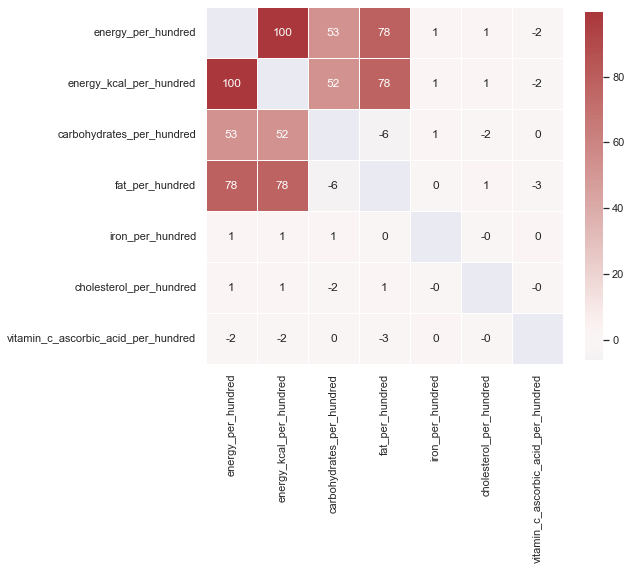

In [176]:
sns.set(rc={"figure.figsize": (6, 6)})

# Plot the correlation matrix
plt.figure(figsize=(8, 8))
sns.heatmap(
    df_detail * 100,
    annot=True,
    fmt=".0f",
    linewidths=0.5,
    mask=np.eye(len(df_detail)),
    square=True,
    center=0,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
)

plt.show()

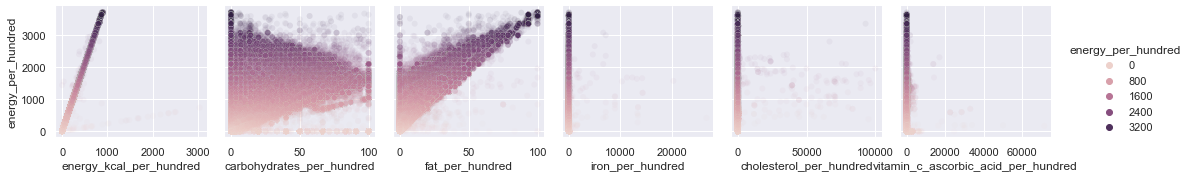

In [190]:
# use the pairplot to see the relationships between two variables in a scatterplot
sns.pairplot(
    per_hundred,
    y_vars=["energy_per_hundred"],
    x_vars=[
        "energy_kcal_per_hundred",
        "carbohydrates_per_hundred",
        "fat_per_hundred",
        "iron_per_hundred",
        "cholesterol_per_hundred",
        "vitamin_c_ascorbic_acid_per_hundred",
    ],
    hue="energy_per_hundred",
    plot_kws={"alpha": 0.05},
)
plt.show()

__Obeservation:__ There is a seemingly complete positive correlation with energy_kcal_per_hundred, which makes sense. With carbohydrates_per_hundred there is no clear correlation visible. For fat_per_hundred there is a positiv correlation, but there are also some outliers. For iron, cholesterol and vitam c there are some extreme values. If I would remove them, the relationship would propably be much  stronger. 

### Taks 3.
_Your task is to test the independence of two categorical variables statistically. Use the energy_per_hundred column to create a new variable with three categories low energy, medium energy and high energy. Test if the level of energy in the product is associated with the country where the product is produced._

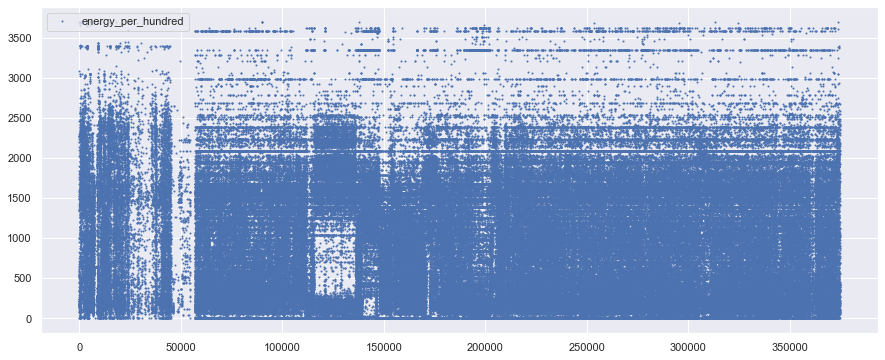

In [178]:
# Let's have a look at the data
df[["energy_per_hundred"]].plot(
    lw=0, marker=".", subplots=True, figsize=(15, 6), markersize=2
)
plt.show()

In [179]:
# Based on the 25th, 50th, and 75th percentiles I make my categorical variabels
df[["energy_per_hundred"]].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
energy_per_hundred,307488.0,1041.09,752.38,0.0,334.72,1033.45,1594.1,3700.0


In [180]:
# create a list of the conditions
conditions = [
    (df["energy_per_hundred"] <= 310),
    (df["energy_per_hundred"] > 310) & (df["energy_per_hundred"] <= 1570),
    (df["energy_per_hundred"] > 1570),
]

# create a list of the values we want to assign for each condition
values = ["low", "medium", "high"]

# create a new column and use np.select to assign values to it using our lists as arguments
df["energy_level"] = np.select(conditions, values)

# display updated DataFrame
df[["product_name_en", "country", "energy_per_hundred", "energy_level"]].tail()

,product_name_en,country,energy_per_hundred,energy_level
374867,NaN,CH,443.0,medium
374877,NaN,CH,2548.0,high
374878,NaN,CH,858.0,medium
374880,NaN,CH,NaN,0
374881,NaN,CH,2418.0,high


In [181]:
# display number of product within each energy level
df["energy_level"].value_counts()

medium    155143
high       79345
low        73000
0          13540
Name: energy_level, dtype: int64

__Consideration:__

The Chi-Square test of independence is used to determine if there is a significant relationship between two nominal (categorical) variables.  The frequency of each category for one nominal variable is compared across the categories of the second nominal variable. I decided to use the  _chi2_contingency_ test from _scipy.stats_, which computes the Chi-square test of independence of variables in a contingency table (thus a tabular representation of categorical data).

These are my hypotheses: 
- H₀  — that the 2 categorical variables "energy_level" and "country" are independent of each other.
- H₁  — that the 2 categorical variables "energy_level" and "country" are dependent on each other.

This is my p-value condition:
- p < 0.05 — this means the two categorical variables are correlated.
- p > 0.05 — this means the two categorical variables are not correlated.

In [182]:
# Create the categorical data
cat_data = df[["country", "energy_level"]].value_counts()
cat_data

country  energy_level
US       medium          144574
         high             71973
         low              68871
         0                13453
CH       medium            9984
         high              6904
         low               3891
DE       medium             437
         high               356
         low                186
IT       medium             119
         high               102
CH       0                   85
IT       low                 40
FR       medium              29
         low                 12
         high                10
IT       0                    1
DE       0                    1
dtype: int64

In [183]:
# Series to dataframe
cat_df = cat_data.to_frame().reset_index()
cat_df.head(2)

,country,energy_level,0
0,US,medium,144574
1,US,high,71973


In [184]:
# rename the columns
cat_df.rename(
    columns={
        cat_df.columns[2]: "values",
    },
    inplace=True,
)

# set country column as index
cat_df2 = cat_df.set_index("country")

# show head
cat_df.head()

,country,energy_level,values
0,US,medium,144574
1,US,high,71973
2,US,low,68871
3,US,0,13453
4,CH,medium,9984


In [185]:
# Pivot
cat_df2 = cat_df.pivot_table(index="country", columns="energy_level", values="values")
cat_df2

energy_level,0,high,low,medium
country,,,,
CH,85.0,6904.0,3891.0,9984.0
DE,1.0,356.0,186.0,437.0
FR,NaN,10.0,12.0,29.0
IT,1.0,102.0,40.0,119.0
US,13453.0,71973.0,68871.0,144574.0


In [186]:
# drop the column whith no energy level assigned
cat_df2.drop(columns=["0"], inplace=True)

In [187]:
import scipy.stats as stats

In [188]:
# perform the Chi-Square Test of Independence
stats.chi2_contingency(cat_df2)

(832.2887069782554,
 2.256934531292324e-174,
 8,
 array([[5.36186698e+03, 4.93309332e+03, 1.04840397e+04],
        [2.52623696e+02, 2.32422078e+02, 4.93954226e+02],
        [1.31601721e+01, 1.21077896e+01, 2.57320383e+01],
        [6.73491161e+01, 6.19633937e+01, 1.31687490e+02],
        [7.36500000e+04, 6.77604134e+04, 1.44007587e+05]]))

__Observation:__
The way to interpret the output is as follows:

- Chi-Square Test Statistic: 832
- p-value: 2.256934531292324e-174 (equals to a number close to zero)
- Degrees of freedom: 8 (calculated as #rows-1 * #columns-1)
- Array: The array displays the expected values for each cell in the contingency table.


Since the p-value of the test is much less than 0.05, we can reject the null hypothesis. This means we do have sufficient evidence to say that there is an association between the country and the energy level of products.

<a id="bottom"></a> [back to top](#top)